# Case Study 2: Visualisation in machine learning

## Outline
In this lab we will explore how we can use visualisation to explore data before we begin training models. We will do this in the context of a challenge to classify audio data.

### Task
The task involves optimising the pre-processing of features for a simple classification problem, using visualisation (unsupervised learning) to help guide you in choosing good feature vector selection. The idea is to get *insight* into the data **using visualisation** to create effective machine learning models.

### Classifier
We will only use the most basic of classifiers in this example -- **k nearest neighbours** -- and focus on how to process the features to make this simple algorithm work as effectively as possible. Many modern approaches would use deep learning to learn an end-to-end classifier that infers appropriate feature extraction directly.

Everything to do the analysis and testing is provided for you. Your task is to modify the parameters that affect the creation of the feature vectors (see the green highlighted box below) and explore different visualisations to help identify a good feature transform.


In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import audio_task

# The challenge
<a id="challenge"></a>
You have to use visualisation strategies to choose a feature vector transform for a classifier that classifies the region of a device that is being touched based on the sound recorded from a piezo contact microphone. There are four possible touch regions and also a silence/handling noise class (class 0):

<img src="imgs/regions.png"> 

The data are all in the `data/` folder.

You have training data for these regions, `challenge_train_{01234}.wav`

See the code below which plots test datasets consisting of labeled mixtures of these classes alongside your predicted labels.  The code below loads the data from 4Khz 16 bit mono wavefiles into a collection of features vectors `X` and a corresponding set of labels `y`.  

### Feature selection
You can modify the feature selection properties set below to adjust the results. **The rest of the pipeline is fixed  -- you cannot modify the classifier itself in this exercise.**
<div class="alert alert-box alert-success">
    
This cell below is the only control you have over the performance of the classification. You will use the visualisation techniques to explore how these transforms change the data you get. NOTE: you may well not understand the meaning of the parameters. Use the visualisations to help guide you to a good choice.
</div>

In [2]:
######### PARAMETERS ##################
# You can change these values
# 1 sample = 1/4096 of a second

parameters = {
'size':4096, # how long each window is, in samples
'step':4096, # how many samples to move forward in each window
'decimate':1, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0.0, 1.0), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"boxcar", # one of window_fns (below)
'feature_fn':"fft" # one of feature_fns    
}
#####################################

valid_feature_fns = ['dct', 'fft', 'fft_phase', 'dct_phase', 'cepstrum', 'raw']
valid_window_fns = ['hamming', 'hann', 'boxcar', 'blackmanharris']

#### A deeper dive into the parameters available to change

**Size**
- **Description:** The size parameter determines the length of each window in samples.
- **Effect on Data:** Larger sizes capture more information, potentially allowing the model to learn complex patterns. However, it may reduce training data and lead to overfitting.

**Step**
- **Description:** The step parameter defines how many samples to move forward in each window, ie if size==step then no overlap.
- **Effect on Data:** Overlapping windows provide more context to the model and increase training data. Too much overlap may lead to overfitting.

**Decimate**
- **Description:** Decimation reduces the number of samples in a signal by loading every nth element.
- **Effect on Data:** Reducing the feature vector through decimation can help in reducing computational load.

**Feature range**
- **Description:** Specifies what portion of the feature vectors to take (start, end) between 0.0 and 1.0.
- **Effect on Data:** Focus on a specific range of feature vectors, useful if certain parts of the data are more relevant.
- **Original** what slice of the feature vectors to take (0.0, 1.0)=whole vector must be between 0.0 and 1.0 for the start and end 
 

**Window functions**
- **Description:** Window functions are applied to the data within each window in signal processing.
- **Effect on Data:** Different functions affect how the signal is weighted within each window.
  - `hamming`: Tapers the data smoothly, reduces spectral leakage.
  - `hann`: Similar to Hamming but has slightly steeper sides.
  - `boxcar`: No tapering, all data in the window is equally weighted.
  - `blackmanharris`: Reduces sidelobes in the frequency domain.


**Feature functions**
- **Description:** Feature functions define how features are extracted from the windows.
- **Effect on Data:** Different functions capture different aspects of the data.
  - `dct`: Discrete Cosine Transform.
  - `fft`: Fast Fourier Transform.
  - `fft_phase`: Phase information from FFT.
  - `dct_phase`: Phase information from DCT.
  - `cepstrum`: Quefrency representation of a signal.
  - `raw`: Raw data (no specific feature extraction).

Run the following cells to (re)load the data into a set of features and labels

In [3]:
X, y = audio_task.load_data(parameters)
print("X shape", X.shape, "y shape", y.shape)

Loading into 21 windows of length 4096
Loading into 51 windows of length 4096
Loading into 44 windows of length 4096
Loading into 62 windows of length 4096
Loading into 60 windows of length 4096
Using fft transform and a boxcar window.
X shape (238, 4096) y shape (238,)


## Visualisation

We can visualise these features. Experiment with using:
* PCA `sklearn.decomposition.pca`
* LLE `sklearn.manifold.LocallyLinearEmbedding`
* ISOMAP `sklearn.manifold.Isomap`
* tSNE `sklearn.manifold.TSNE`
* UMAP `umap`

You can use alternative visualisation methods if you wish. **You may need to subsample the features to visualise in reasonable time.**. For example, you can subsample to just every 10th feature vector using `X[::10, :]`

Use the visualisations to find a feature vector selection that you expect to perform well with a a kNN classifier. Use the visualisation to explore these transforms rather than trial and error with the classifier itself.

<div class="alert alert-box alert-success"> 

**Task**: iterate over visualisations and tweaks to the feature preprocessing to see if you can find a structure that separates classes well.
</div>

### Using PCA

Scatter Plot for PCA (2D)

{'size': 4000, 'step': 1000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'cepstrum'}
Loading into 86 windows of length 4000


Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using cepstrum transform and a hamming window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using cepstrum transform and a boxcar window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using cepstrum transform and a blackmanharris window.


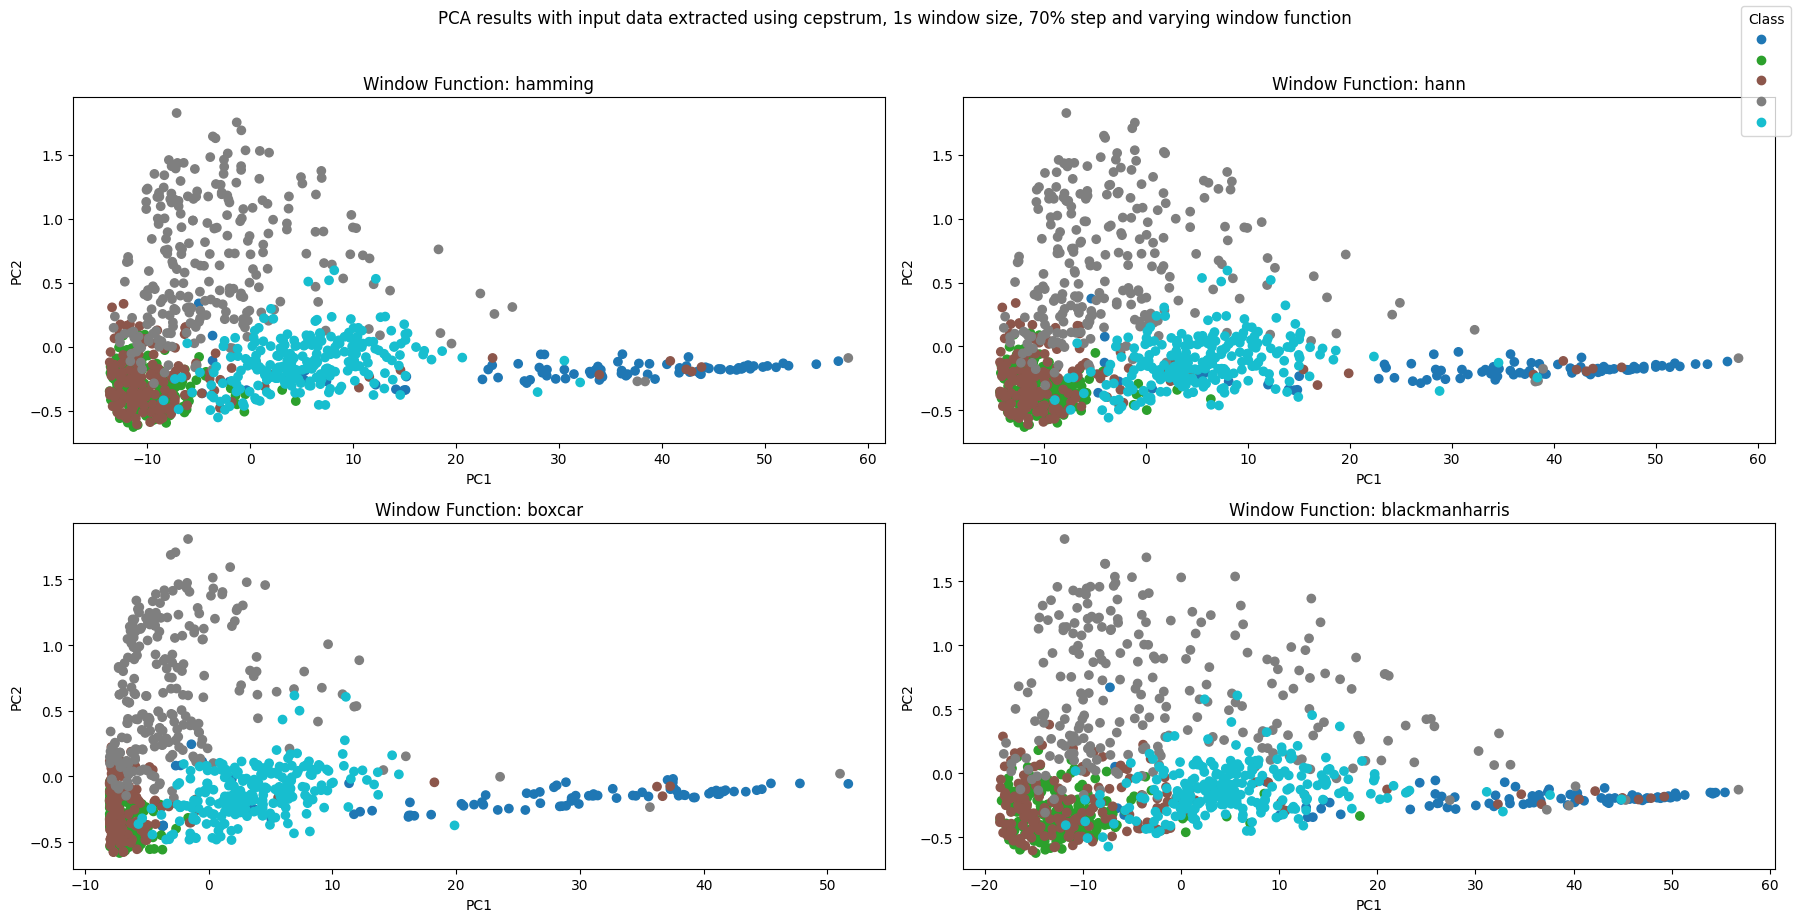

{'size': 4000, 'step': 2000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'blackmanharris', 'feature_fn': 'cepstrum'}
Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows of length 4000
Loading into 123 windows of length 4000
Using cepstrum transform and a hamming window.
Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows of length 4000
Loading into 123 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows of length 4000
Loading into 123 windows of length 4000
Using cepstrum transform and a boxcar window.
Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows 

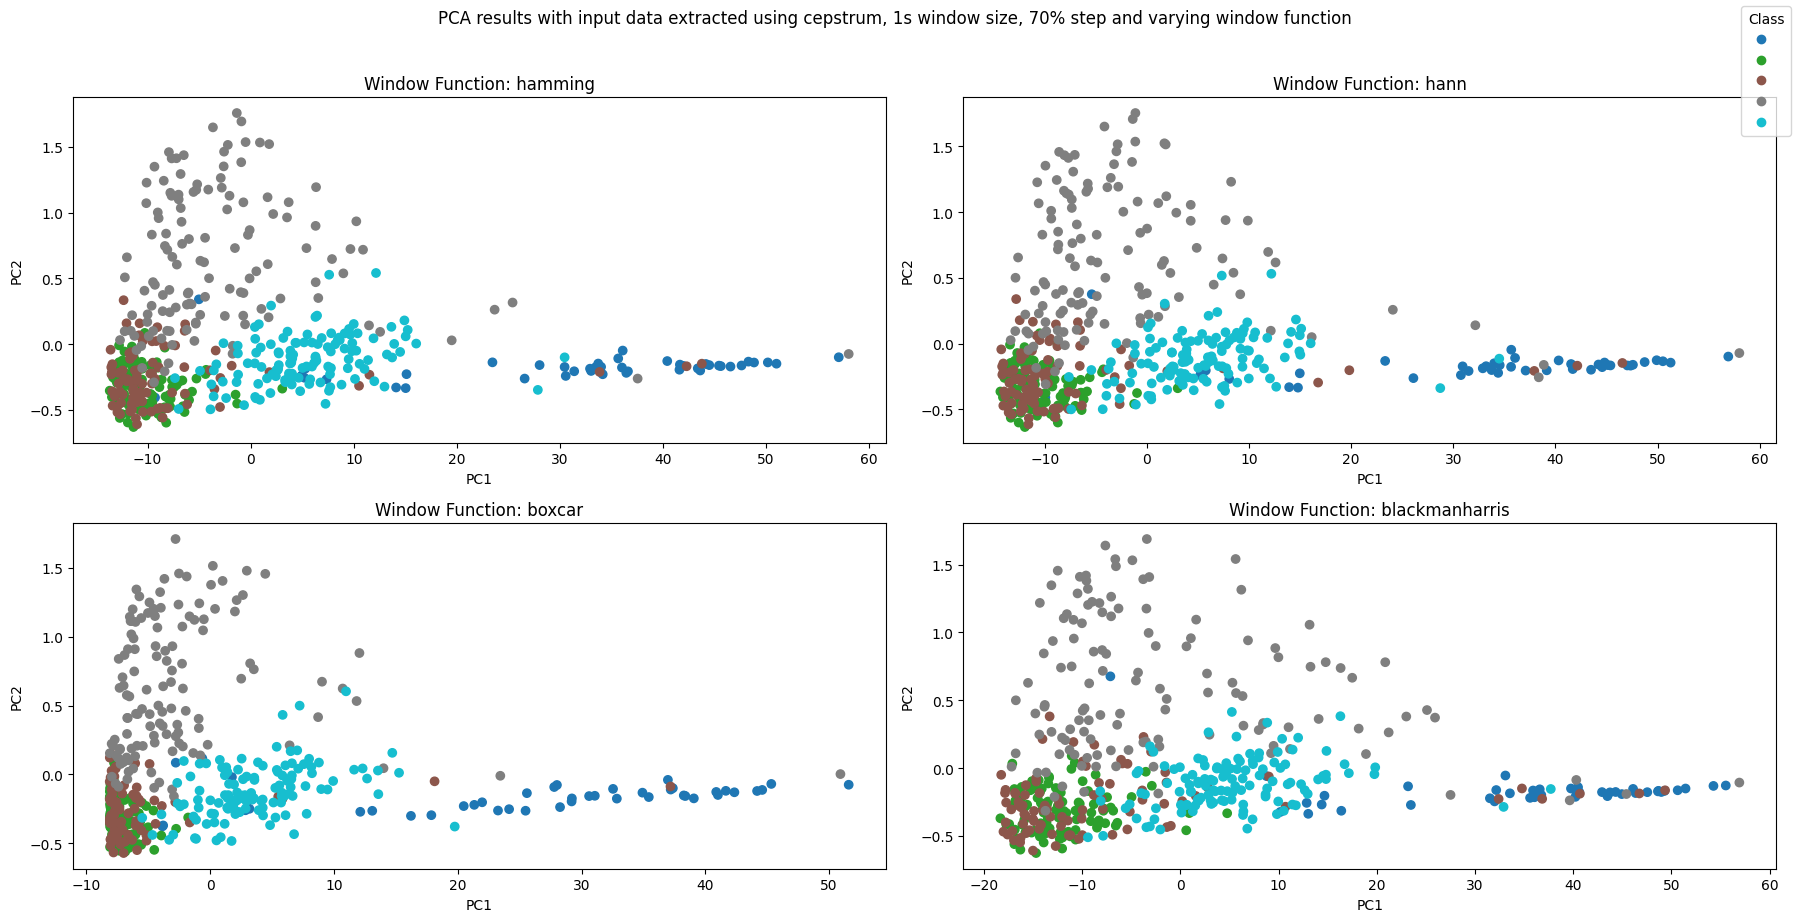

{'size': 4000, 'step': 3000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'blackmanharris', 'feature_fn': 'cepstrum'}
Loading into 29 windows of length 4000
Loading into 69 windows of length 4000
Loading into 60 windows of length 4000
Loading into 85 windows of length 4000
Loading into 82 windows of length 4000
Using cepstrum transform and a hamming window.
Loading into 29 windows of length 4000
Loading into 69 windows of length 4000
Loading into 60 windows of length 4000
Loading into 85 windows of length 4000
Loading into 82 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 29 windows of length 4000
Loading into 69 windows of length 4000
Loading into 60 windows of length 4000
Loading into 85 windows of length 4000
Loading into 82 windows of length 4000
Using cepstrum transform and a boxcar window.
Loading into 29 windows of length 4000
Loading into 69 windows of length 4000
Loading into 60 windows of length 4000
Loading into 85 windows of length 4

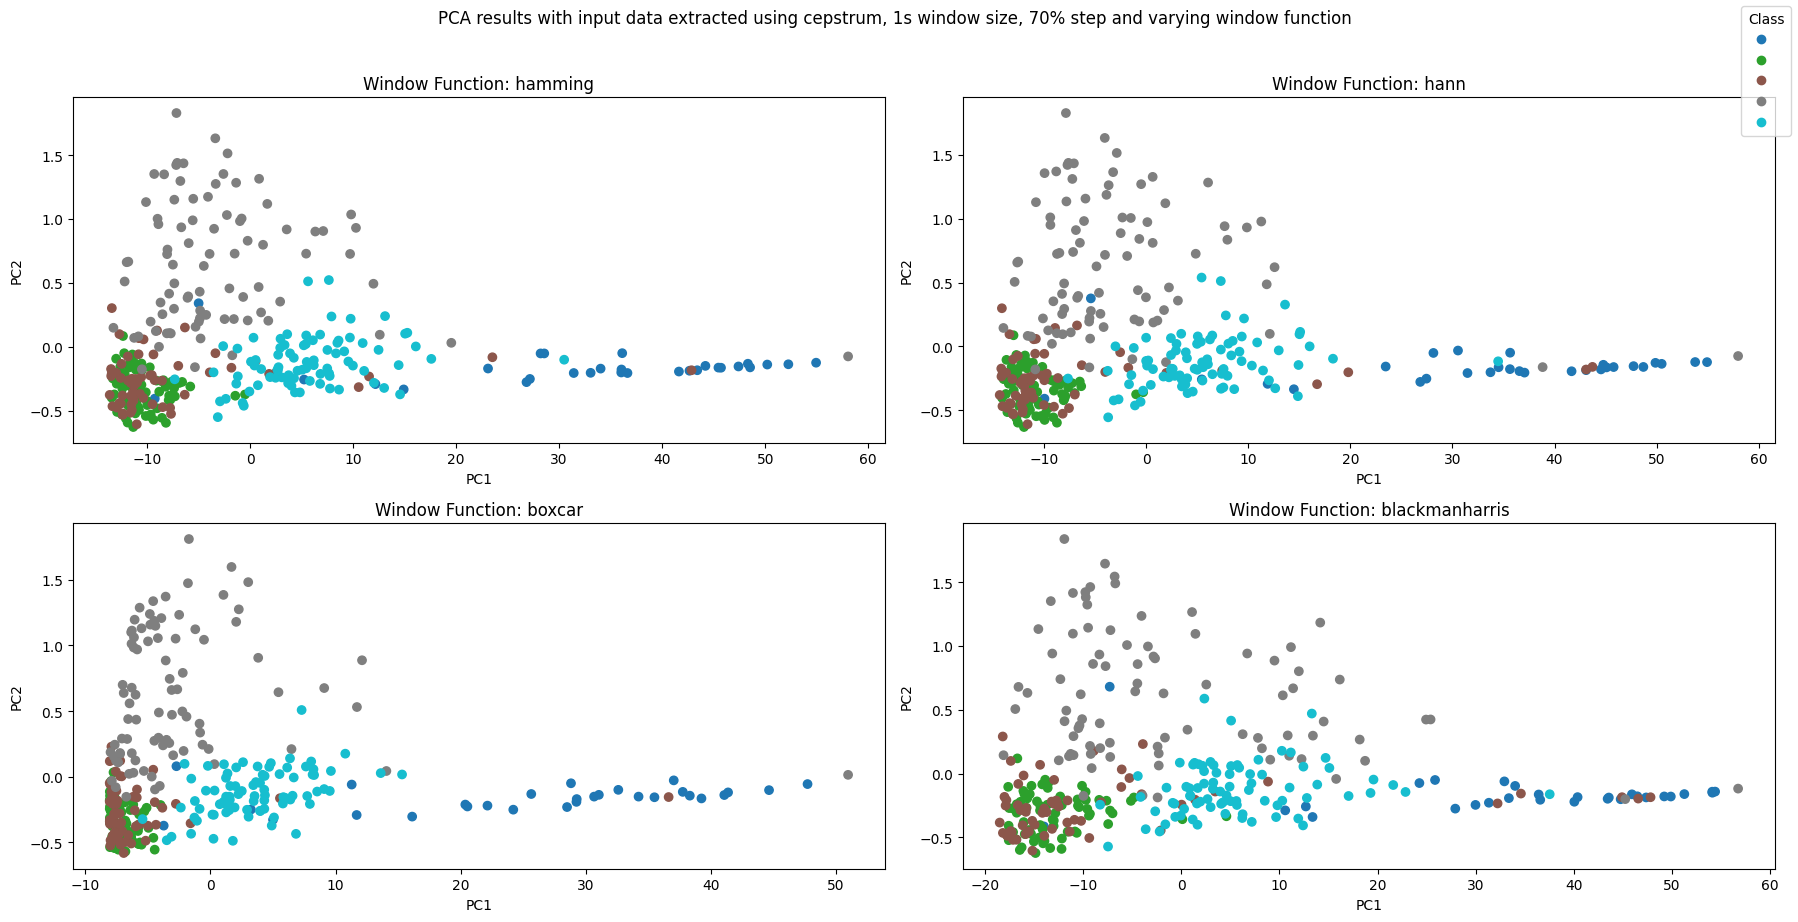

{'size': 4000, 'step': 4000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'blackmanharris', 'feature_fn': 'cepstrum'}
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using cepstrum transform and a hamming window.
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using cepstrum transform and a boxcar window.
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4

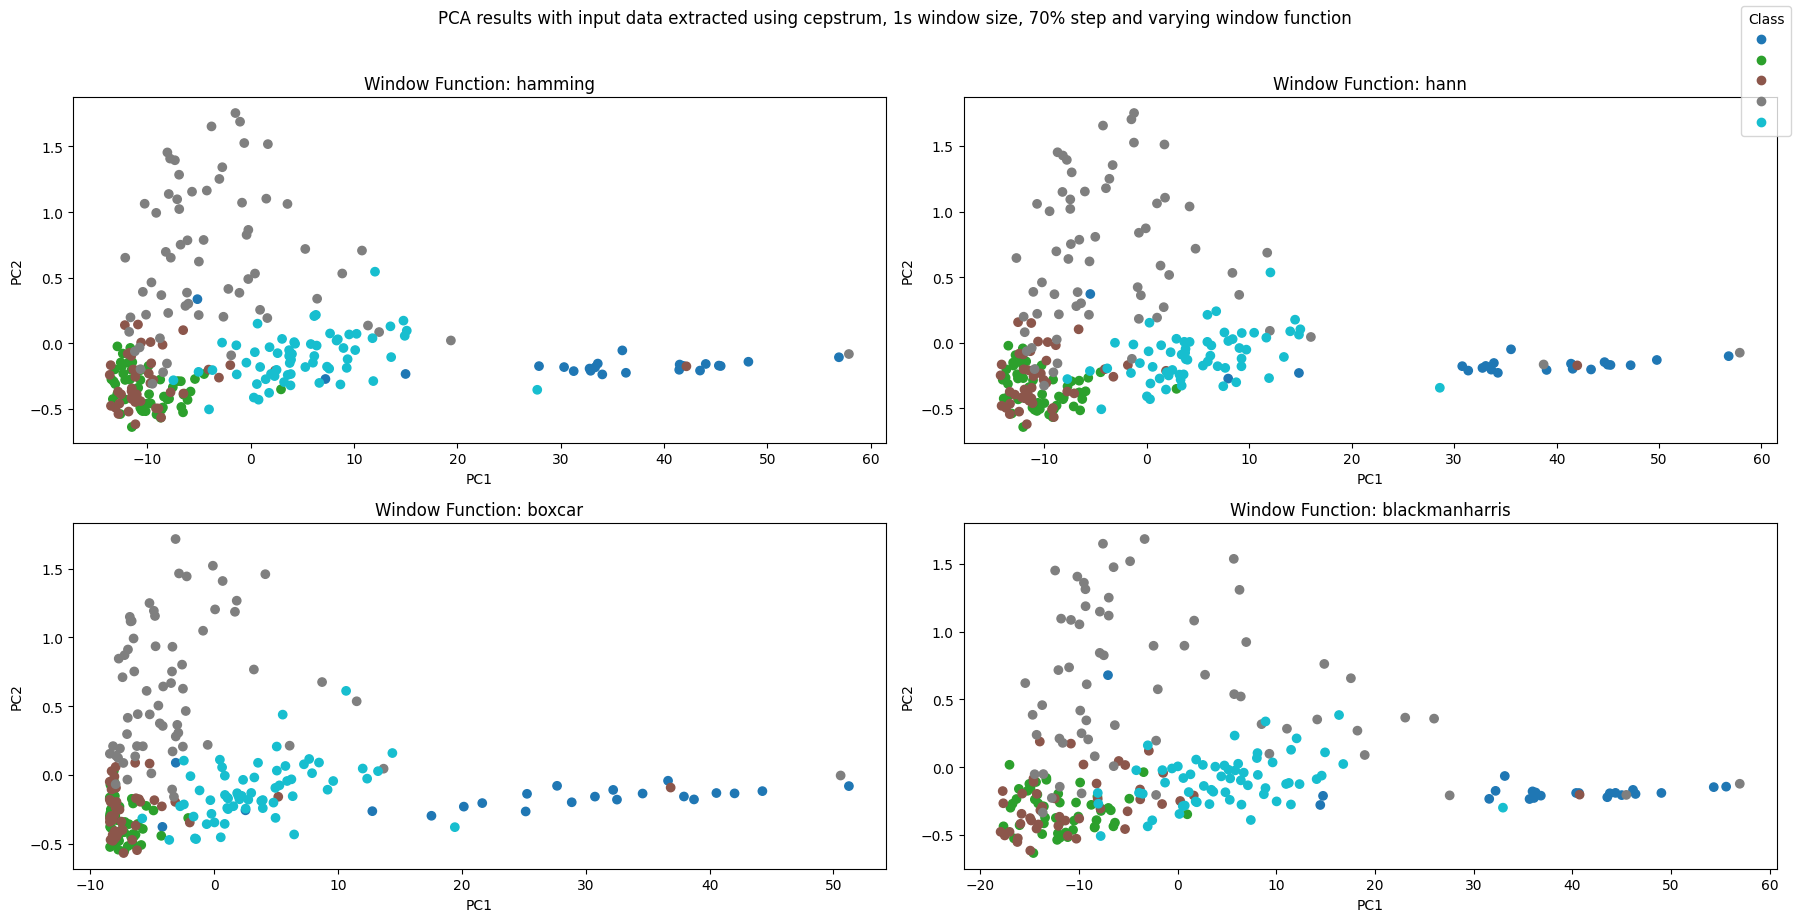

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pca_2d_plot(parameters, varying_parameter, varying_parameter_list):
    """
    Visualize a 2D representation of the data using pca with a varying parameter.

    Parameters:
    - parameters: Dictionary containing parameters for audio data loading.
    - varying_parameter: Name of the varying parameter.
    - varying_parameter_list: List of values for the varying parameter.
    """
    
    fig, axs = plt.subplots(2, len(varying_parameter_list)//2, figsize=(18, 9))

    for idx, vp in enumerate(varying_parameter_list):
        parameters[varying_parameter] = vp
        X, y = audio_task.load_data(parameters)

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        row_idx = idx // (len(varying_parameter_list)//2)
        col_idx = idx % (len(varying_parameter_list)//2)

        ax = axs[row_idx, col_idx]
        scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', label=f'step: {vp * 100}%')
        ax.set_title(f'Window Function: {vp}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')

    fig.suptitle(r'PCA results with input data extracted using cepstrum, 1s window size, 70% step and varying window function', y=1.02)
    fig.tight_layout()

    # Add legend
    fig.legend(handles=scatter.legend_elements()[0], title='Class', loc='upper right')

    plt.show()


parameters = {
    'size': 4000, 
    'step': int(4000 * 0.5), 
    'decimate': 1, 
    'feature_range': (0, 1),
    'window_fn': "boxcar",
    'feature_fn': "cepstrum" 
}
for step in [1000,2000,3000,4000]:
    parameters['step'] = step
    print(parameters)
    pca_2d_plot(parameters, 'window_fn', valid_window_fns)

Box Plot for explained variance by PCA

Loading into 351 windows of length 256
Loading into 822 windows of length 256
Loading into 707 windows of length 256
Loading into 1000 windows of length 256
Loading into 970 windows of length 256
Using cepstrum transform and a boxcar window.
Loading into 179 windows of length 500
Loading into 421 windows of length 500
Loading into 362 windows of length 500
Loading into 512 windows of length 500
Loading into 496 windows of length 500
Using cepstrum transform and a boxcar window.
Loading into 89 windows of length 1000
Loading into 210 windows of length 1000
Loading into 181 windows of length 1000
Loading into 256 windows of length 1000
Loading into 248 windows of length 1000
Using cepstrum transform and a boxcar window.
Loading into 44 windows of length 2000
Loading into 105 windows of length 2000
Loading into 90 windows of length 2000
Loading into 128 windows of length 2000
Loading into 124 windows of length 2000
Using cepstrum transform and a boxcar window.
Loading into 22 windows of l

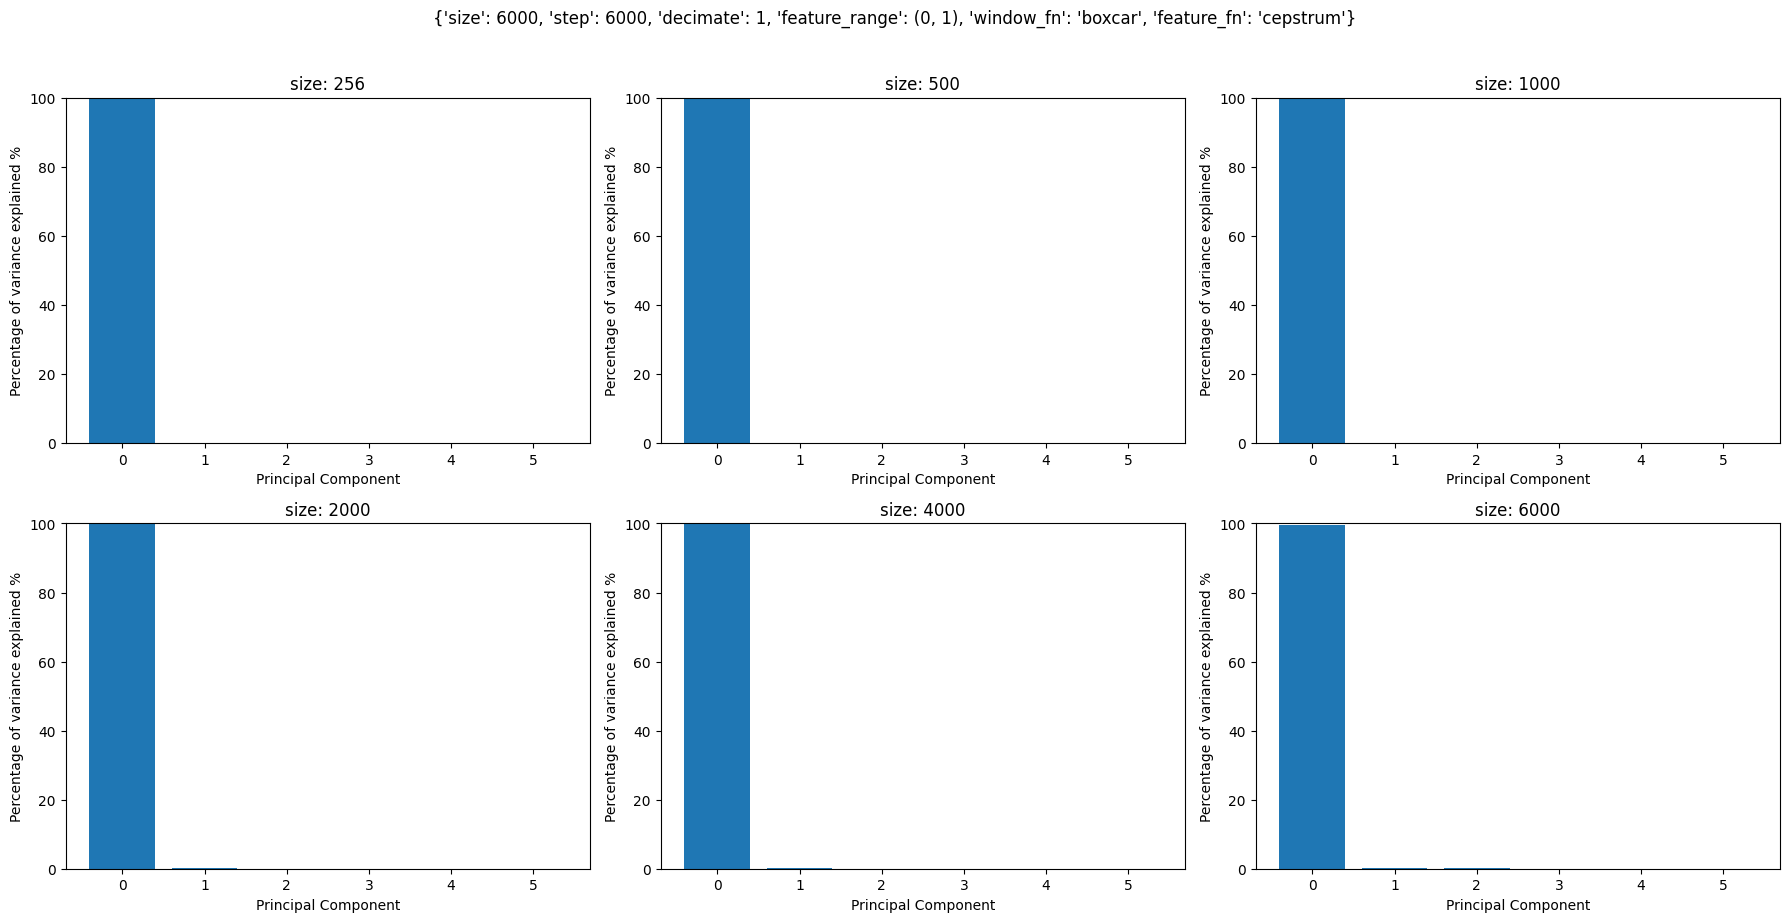

In [5]:
from sklearn.decomposition import PCA 

def pca_ev_plot(parameters, varying_parameter, varying_parameter_list):
    """
    Visualize explained variance by principal components for different values of a varying parameter.

    Parameters:
    - parameters: Dictionary containing parameters for audio data loading.
    - varying_parameter: Name of the varying parameter.
    - varying_parameter_list: List of values for the varying parameter.
    """
    
    plt.figure(figsize=(18, 9))

    for idx, vp in enumerate(varying_parameter_list):
        parameters[varying_parameter] = vp
        parameters['step'] = parameters['size']
        X, y = audio_task.load_data(parameters)

        pca = PCA(n_components=6)
        pca.fit(X)

        plt.subplot(2, len(varying_parameter_list)//2, idx + 1)
        plt.bar(np.arange(6), pca.explained_variance_ratio_[:6] * 100)
        plt.xlabel("Principal Component")
        plt.ylabel("Percentage of variance explained %")
        plt.ylim((0, 100))
        plt.title(f'{varying_parameter}: {vp}')
        
    plt.suptitle(f'{parameters}', y=1.02)
    plt.tight_layout()

    plt.show()

parameters = {
'size':4096, # how long each window is, in samples
'step': 4096, # how many samples to move forward in each window
'decimate':1, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0, 1), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"boxcar", # one of window_fns (below)
'feature_fn':"cepstrum" # one of feature_fns    
}


pca_ev_plot(parameters,'size',[256,500,1000,2000,4000,6000])

Pair Plot for PCA with 5 Components

{'size': 6000, 'step': 6000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'cepstrum'}
Loading into 14 windows of length 6000
Loading into 35 windows of length 6000
Loading into 30 windows of length 6000
Loading into 42 windows of length 6000
Loading into 41 windows of length 6000
Using cepstrum transform and a boxcar window.


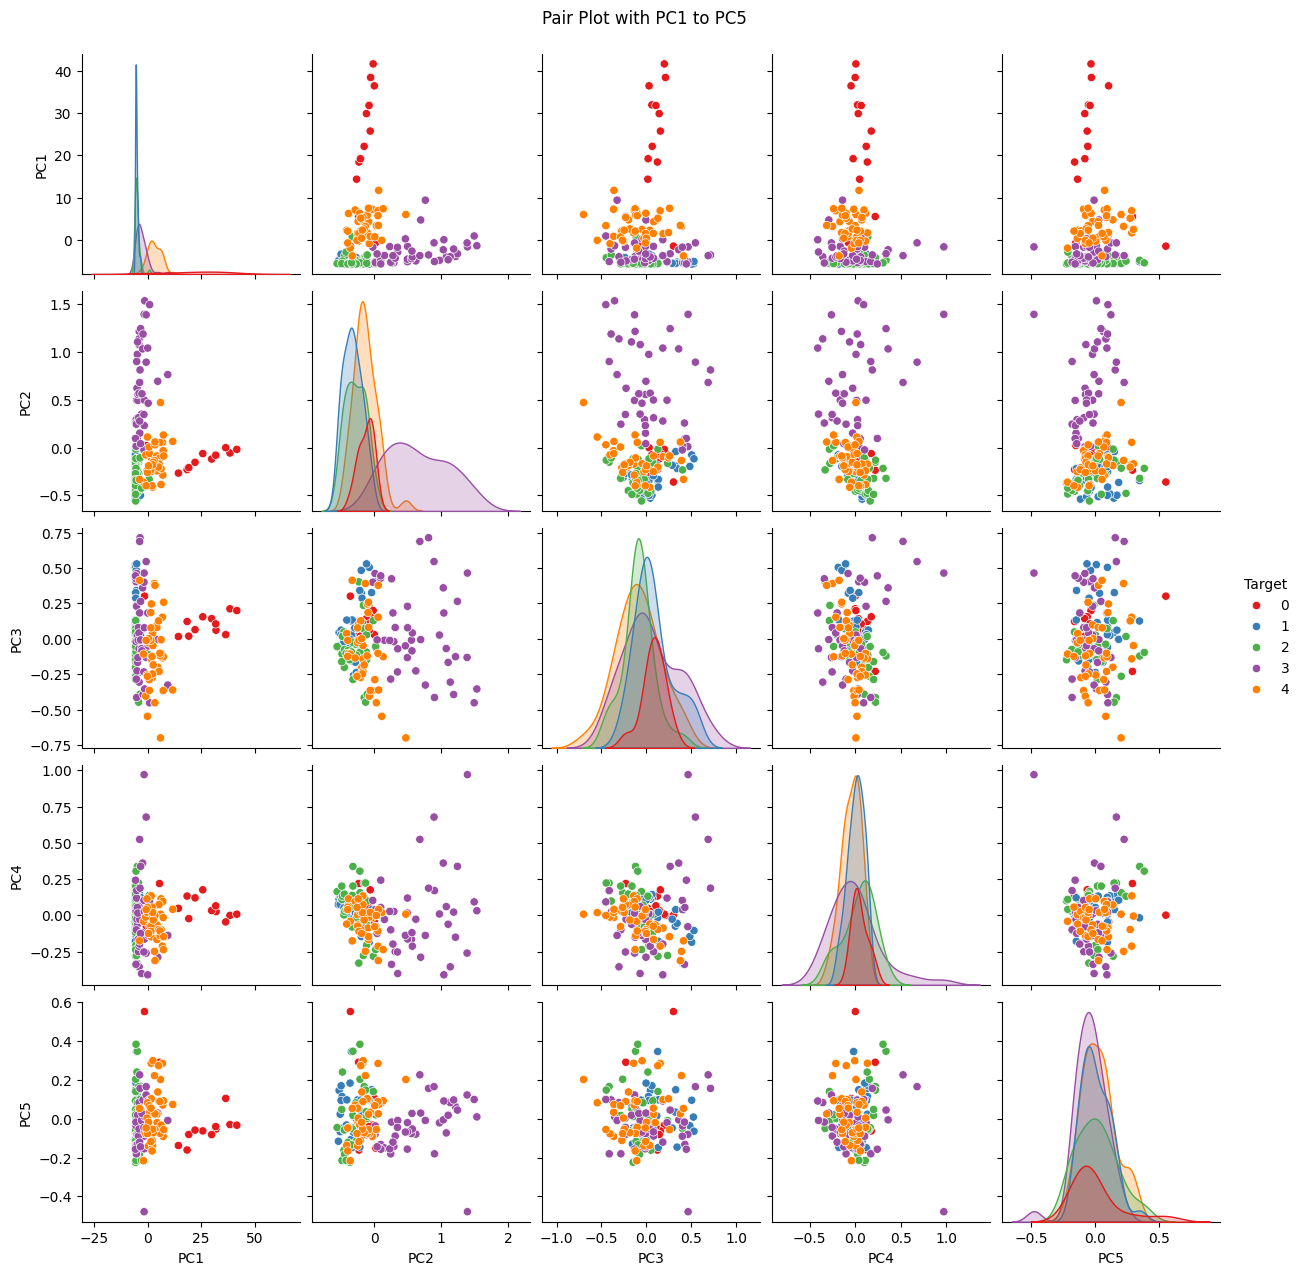

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

def pairplot_with_pca(parameters):
    """
    Create a pair plot with the first five principal components.

    Parameters:
    - X: Feature matrix.
    - y: Target variable.
    """
    X, y = audio_task.load_data(parameters)
    # Perform PCA to get the first five principal components
    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X)

    # Combine PC data and target variable into a DataFrame
    pc_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, 6)])
    pc_df['Target'] = y

    # Create a pair plot using Seaborn
    sns.pairplot(pc_df, hue='Target', palette='Set1')
    plt.suptitle('Pair Plot with PC1 to PC5', y=1.02)
    plt.show()
print(parameters)
pairplot_with_pca(parameters)



3D PCA Scatter using plotly

In [7]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
X,y = audio_task.load_data(parameters)

# Perform PCA
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

# Create a DataFrame for Plotly
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df['label'] = y

# Plotly 3D Scatter Plot
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='label',
                    labels={'PC1': 'First Principal Component',
                            'PC2': 'Second Principal Component',
                            'PC3': 'Third Principal Component'},
                    color_discrete_map={0: 'red', 1: 'green'},
                    title='3D PCA Visualization')

# Update marker styles
fig.update_traces(marker=dict(size=5, opacity=0.5),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()


Loading into 14 windows of length 6000
Loading into 35 windows of length 6000
Loading into 30 windows of length 6000
Loading into 42 windows of length 6000
Loading into 41 windows of length 6000
Using cepstrum transform and a boxcar window.


### Using UMAP

UMAP Plotting Function

In [8]:
import umap

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    X, y = audio_task.load_data(parameters)
    u = fit.fit_transform(X);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=y, cmap='tab10')
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=y, cmap='tab10')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=y,cmap='tab10', s=100)
    plt.title(title, fontsize=18)

2023-12-01 15:26:15.484458: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 15:26:15.484519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 15:26:15.486885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 15:26:15.499471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 15:26:17.962886: W tensorflow/compiler/tf2

Varying Parameters in UMAP

Loading into 85 windows of length 5000
Loading into 206 windows of length 5000
Loading into 177 windows of length 5000
Loading into 252 windows of length 5000
Loading into 244 windows of length 5000
Using fft transform and a hamming window.
Loading into 85 windows of length 5000
Loading into 206 windows of length 5000
Loading into 177 windows of length 5000
Loading into 252 windows of length 5000
Loading into 244 windows of length 5000
Using fft transform and a hann window.
Loading into 85 windows of length 5000
Loading into 206 windows of length 5000
Loading into 177 windows of length 5000
Loading into 252 windows of length 5000
Loading into 244 windows of length 5000
Using fft transform and a boxcar window.
Loading into 85 windows of length 5000
Loading into 206 windows of length 5000
Loading into 177 windows of length 5000
Loading into 252 windows of length 5000
Loading into 244 windows of length 5000
Using fft transform and a blackmanharris window.


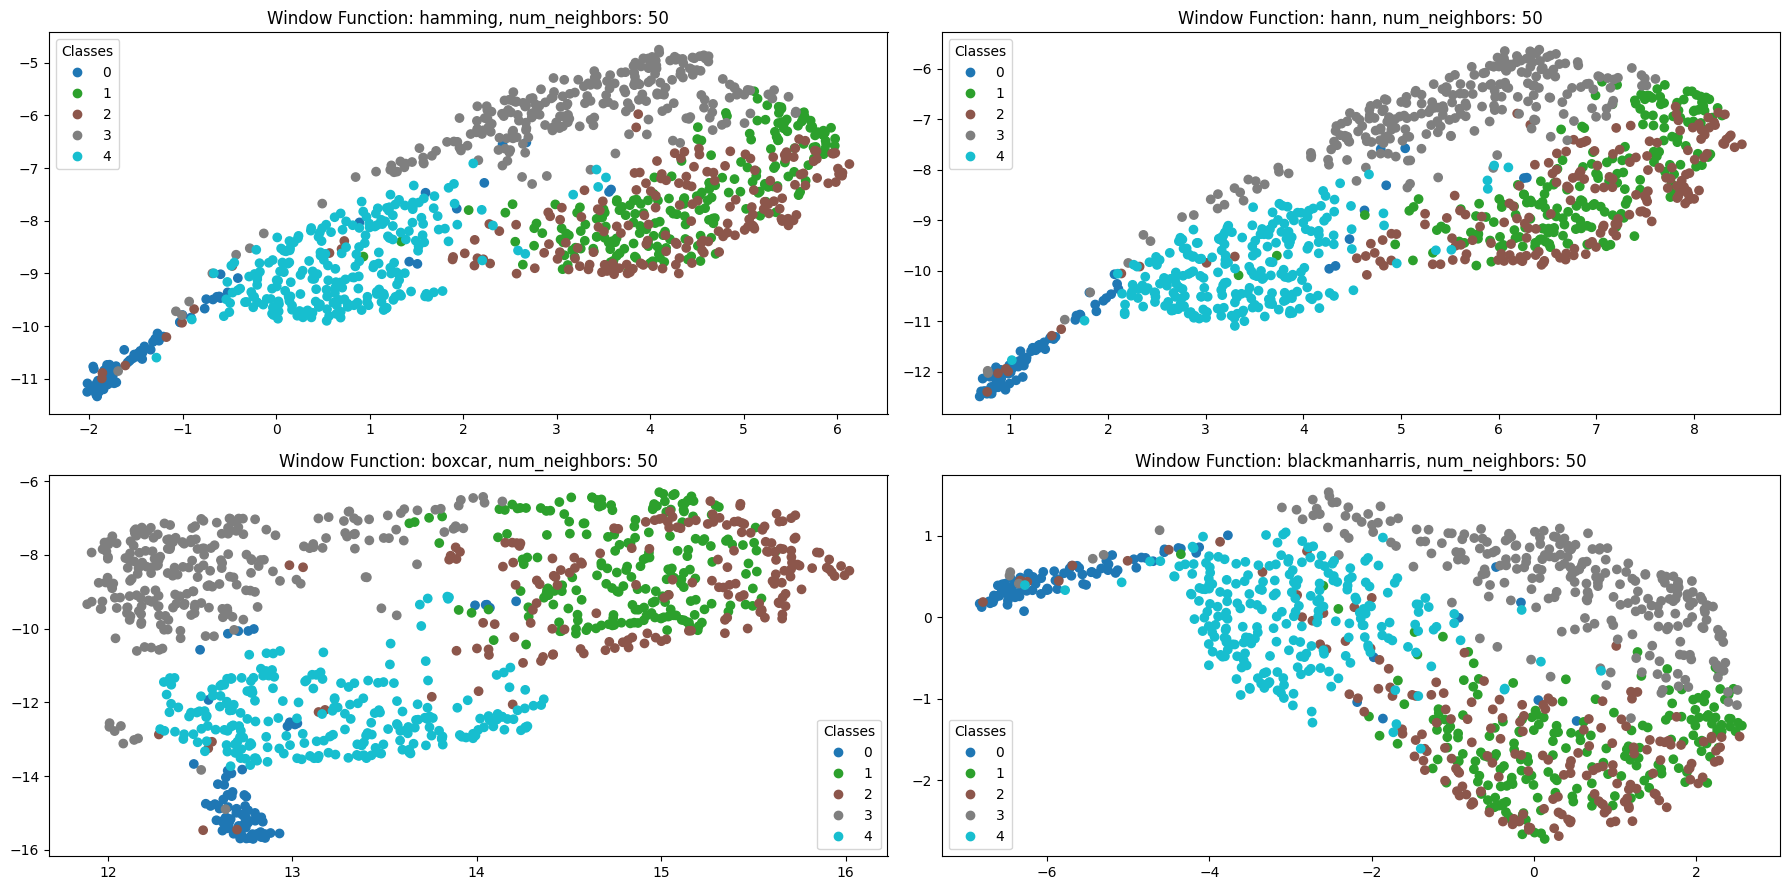

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(18, 9))

parameters = {
'size':5000, 
'step':1000, 
'decimate':5,
'feature_range' :(0, 1),
'window_fn': 'boxcar',
'feature_fn':"fft" 
}

for k in [50]:
    for i,feature_fn  in enumerate(valid_window_fns):
        parameters['window_fn'] = feature_fn
    
        ax = axes[i // 2, i % 2] 
 
        fit = umap.UMAP(n_neighbors=k)
        X, y = audio_task.load_data(parameters)
        u = fit.fit_transform(X)
        
        scatter = ax.scatter(u[:, 0], u[:, 1], c=y, cmap='tab10')
        ax.set_title(f'Window Function: {feature_fn}, num_neighbors: {k}')
        ax.legend(*scatter.legend_elements(), title='Classes')


plt.tight_layout()
plt.show()

Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using dct transform and a boxcar window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using fft transform and a boxcar window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using fft_phase transform and a boxcar window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using dct_phase transform and a boxcar window.
Loading into 86 windows of l

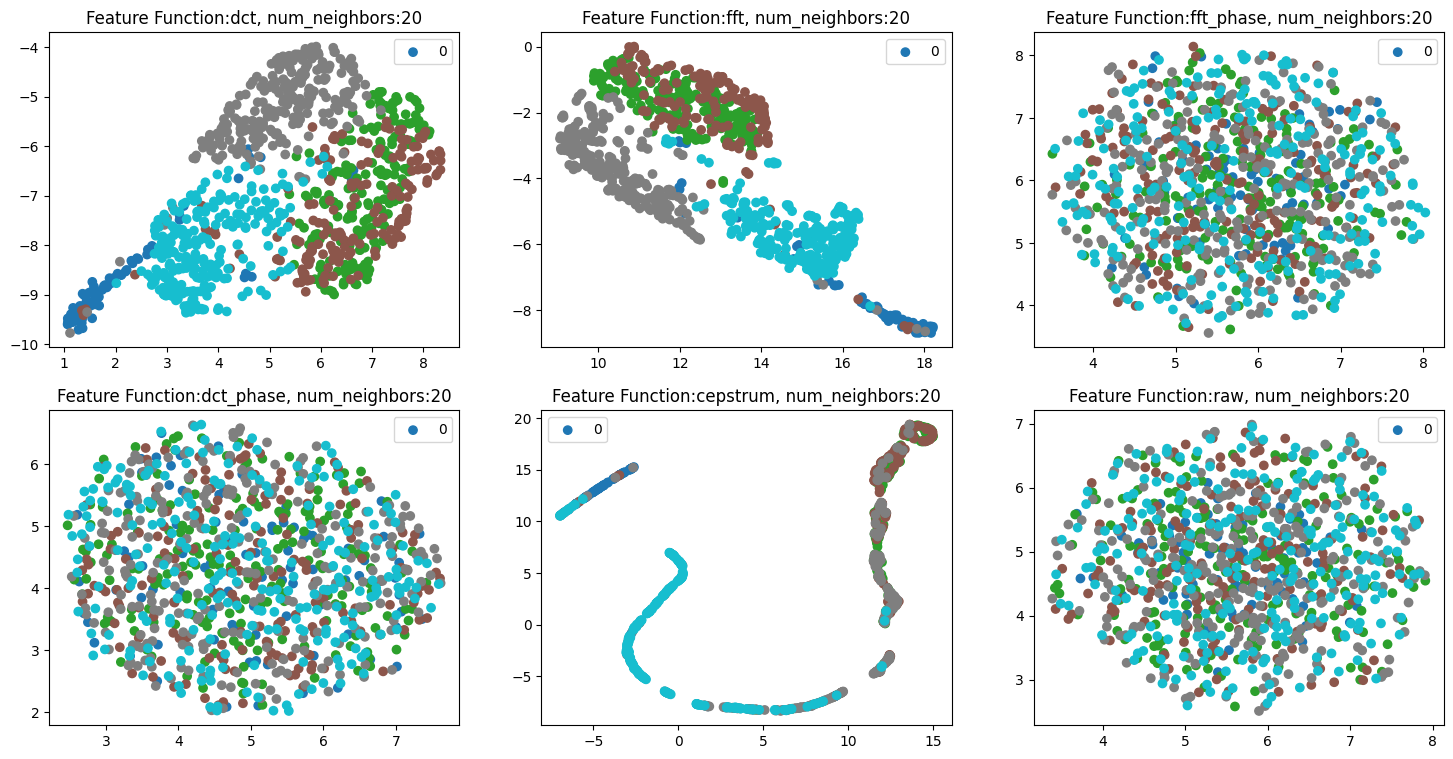

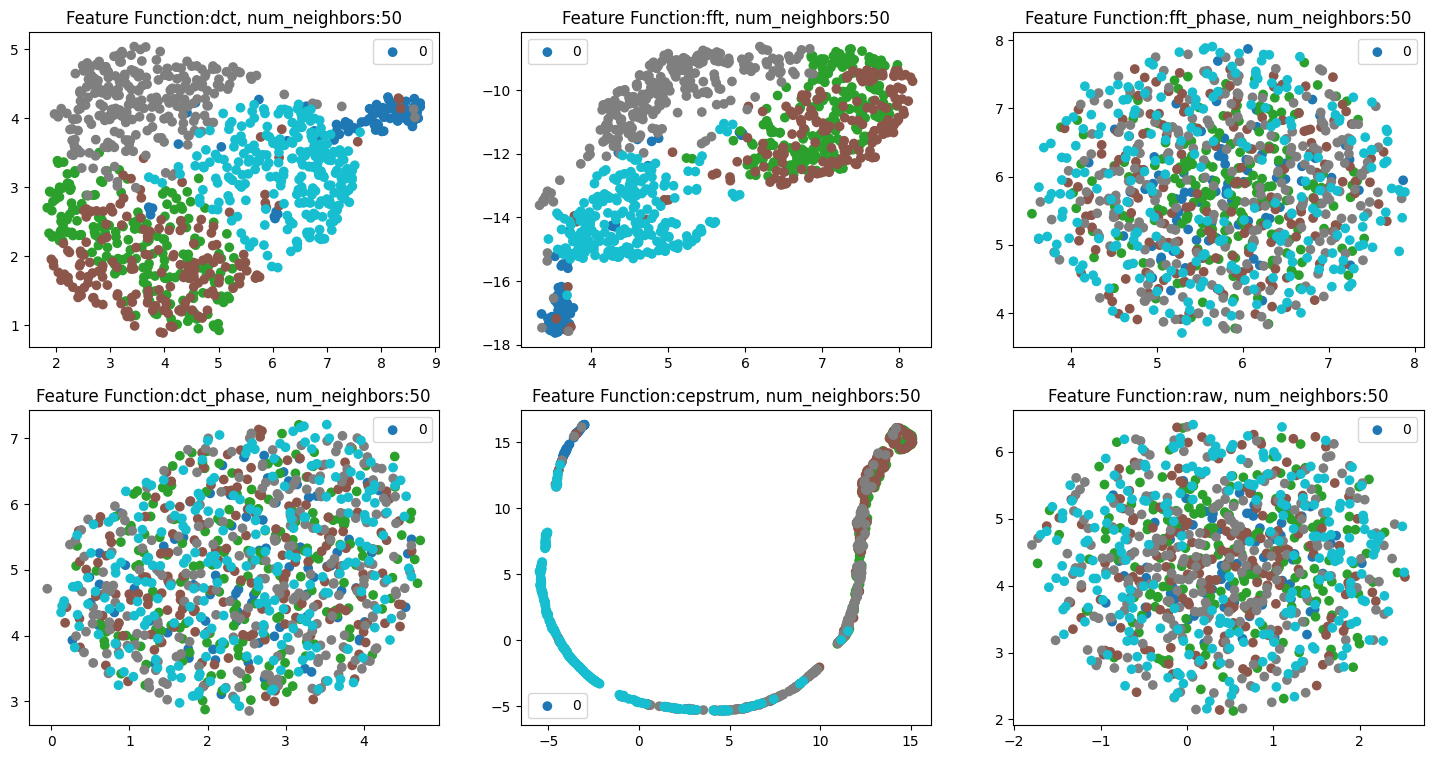

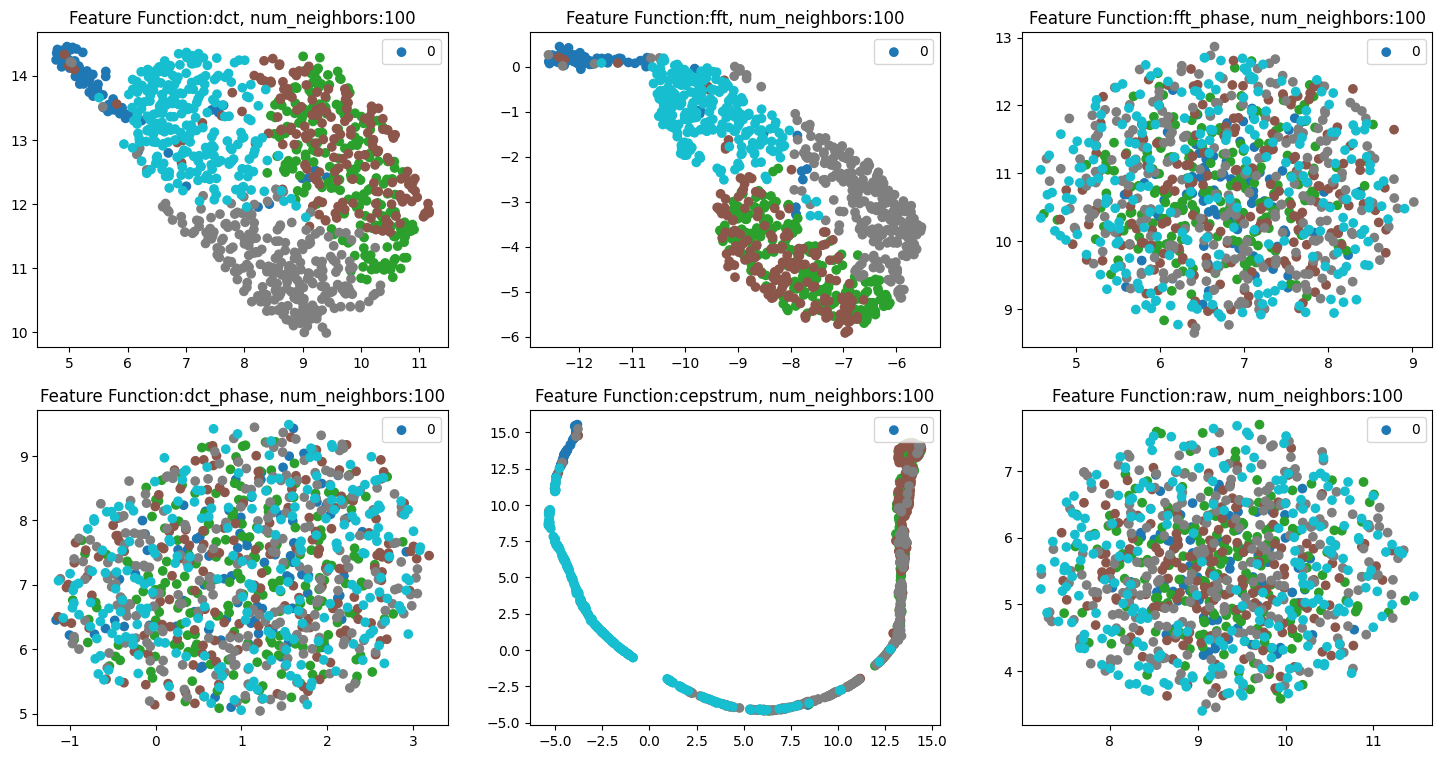

In [10]:
parameters = {
'size':4000, 
'step':1000, 
'decimate':5,
'feature_range' :(0, 1),
'window_fn': 'boxcar',
'feature_fn':"fft" 
}
d =0.1
for k in [20, 50, 100]:
    plt.figure(figsize=(18,9))
    #for size in [50000]:
    for i,feature_fn in enumerate(valid_feature_fns):
            # parameters['size'] = size
            # parameters['step'] = int(size * 0.6)
            parameters['feature_fn'] = feature_fn
            plt.subplot(2,3,i+1)
            fit = umap.UMAP(n_neighbors=k)
            X, y = audio_task.load_data(parameters)
            u = fit.fit_transform(X)
            plt.scatter(u[:,0], u[:,1], c=y, cmap='tab10')
            plt.title(f'Feature Function:{feature_fn}, num_neighbors:{k}')
            plt.legend(y)
            #plt.title(f'size:{size},min_dist:{d}')


Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using dct transform and a boxcar window.
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using fft transform and a boxcar window.
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using fft_phase transform and a boxcar window.
Loading into 22 windows of length 4000
Loading into 52 windows of length 4000
Loading into 45 windows of length 4000
Loading into 64 windows of length 4000
Loading into 62 windows of length 4000
Using dct_phase transform and a boxcar window.
Loading into 22 windows of length 4000
Loadi

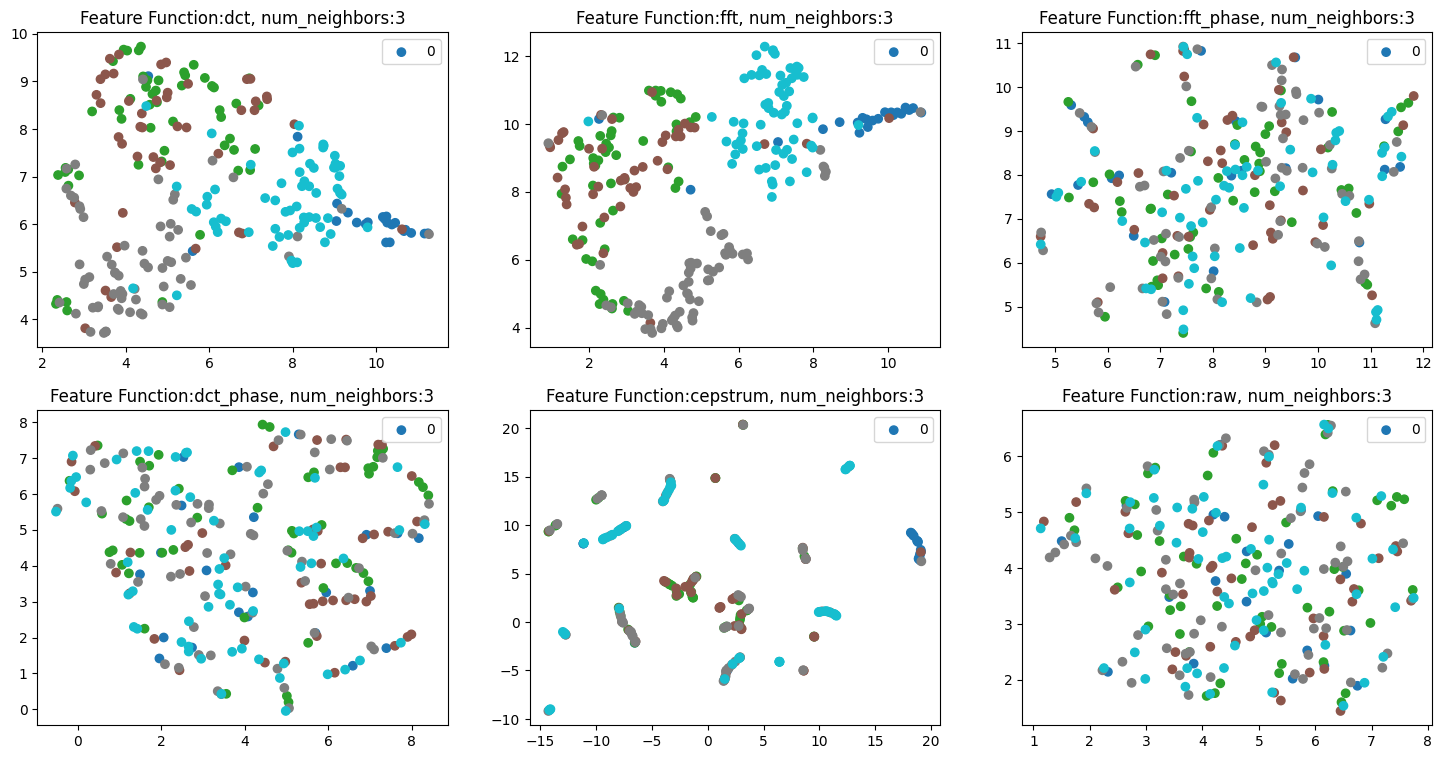

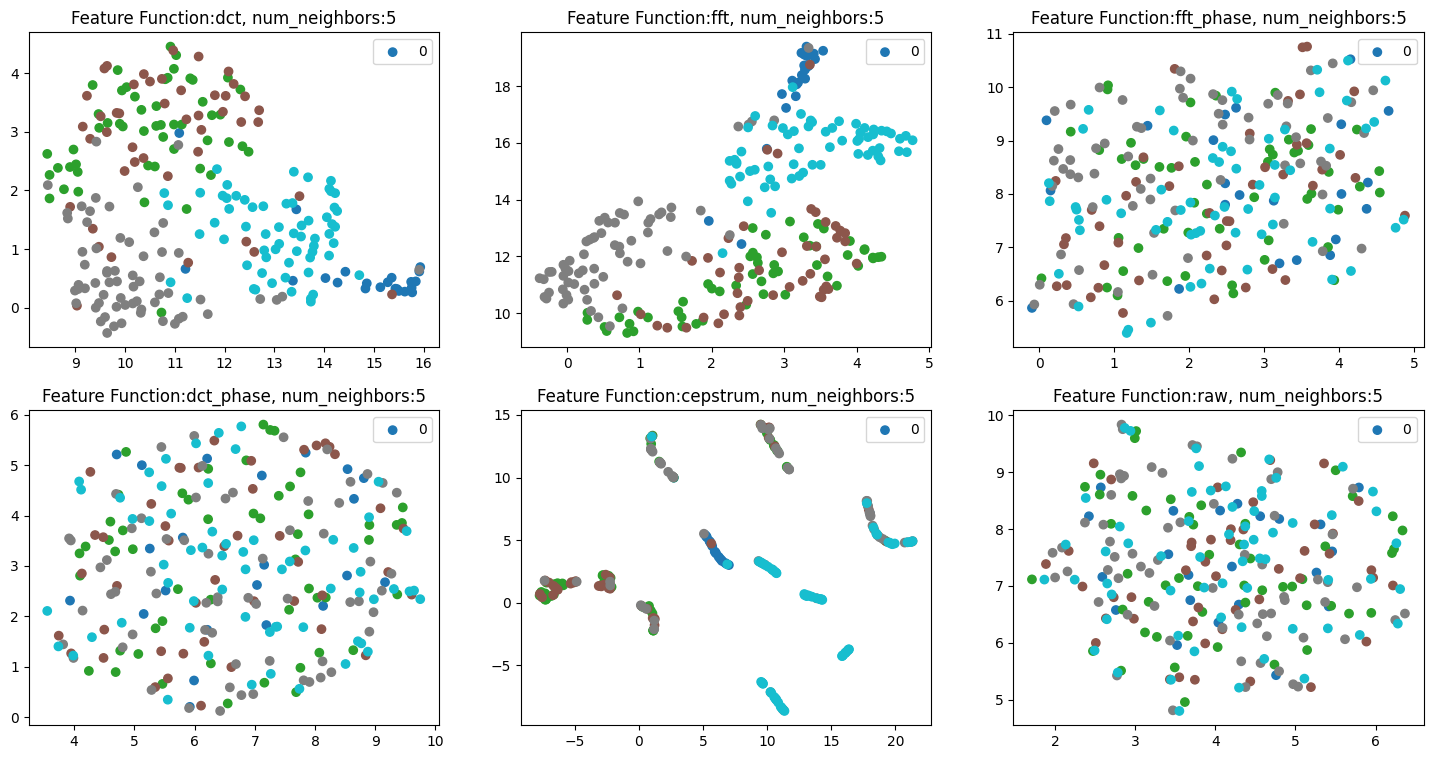

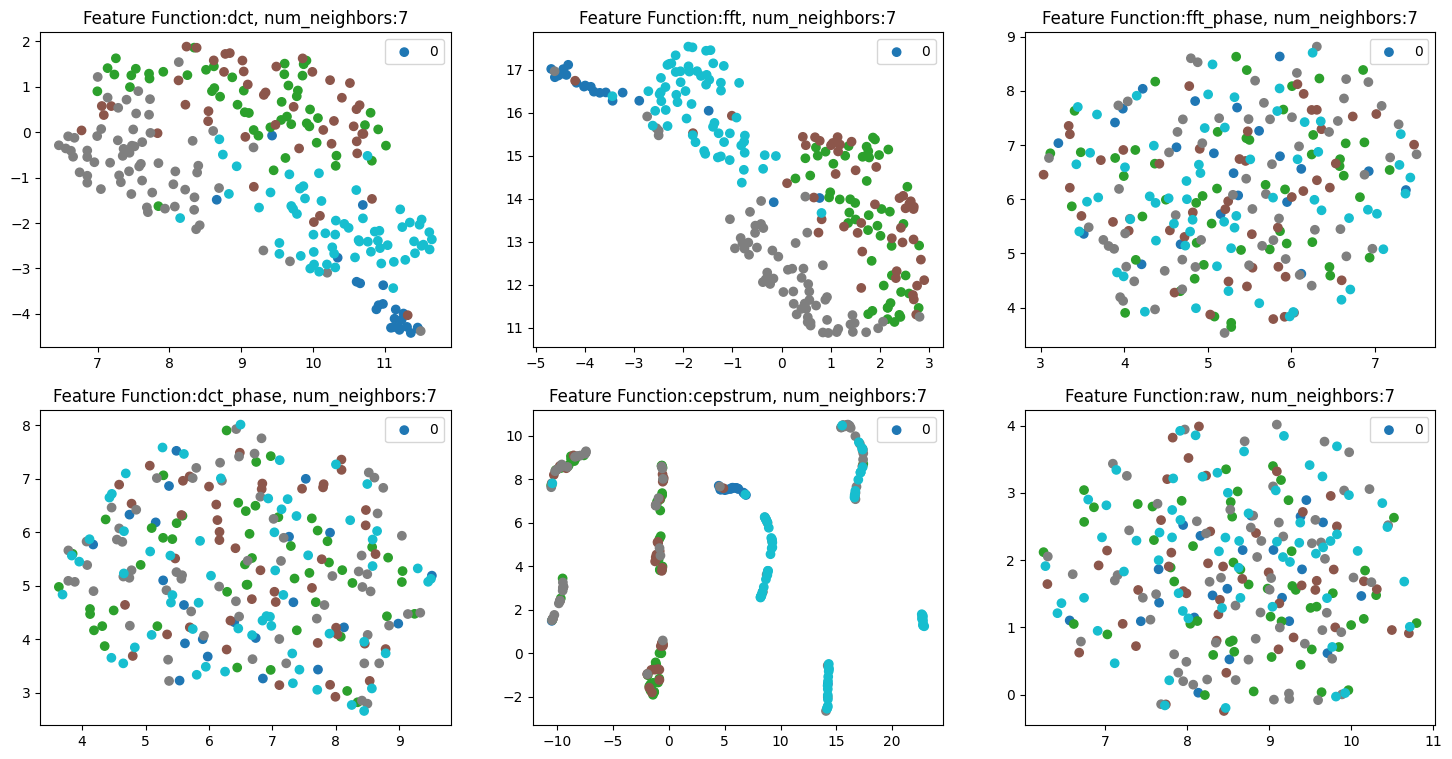

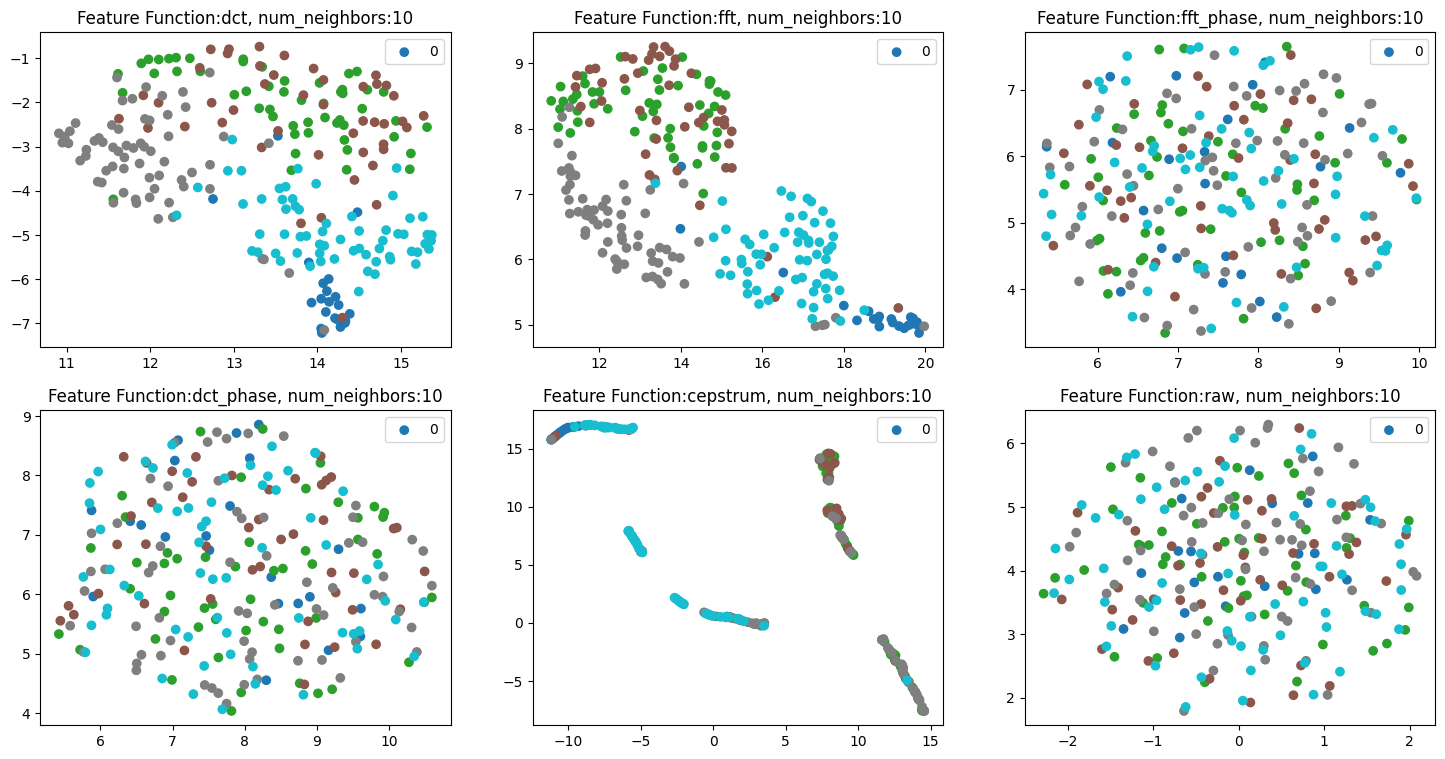

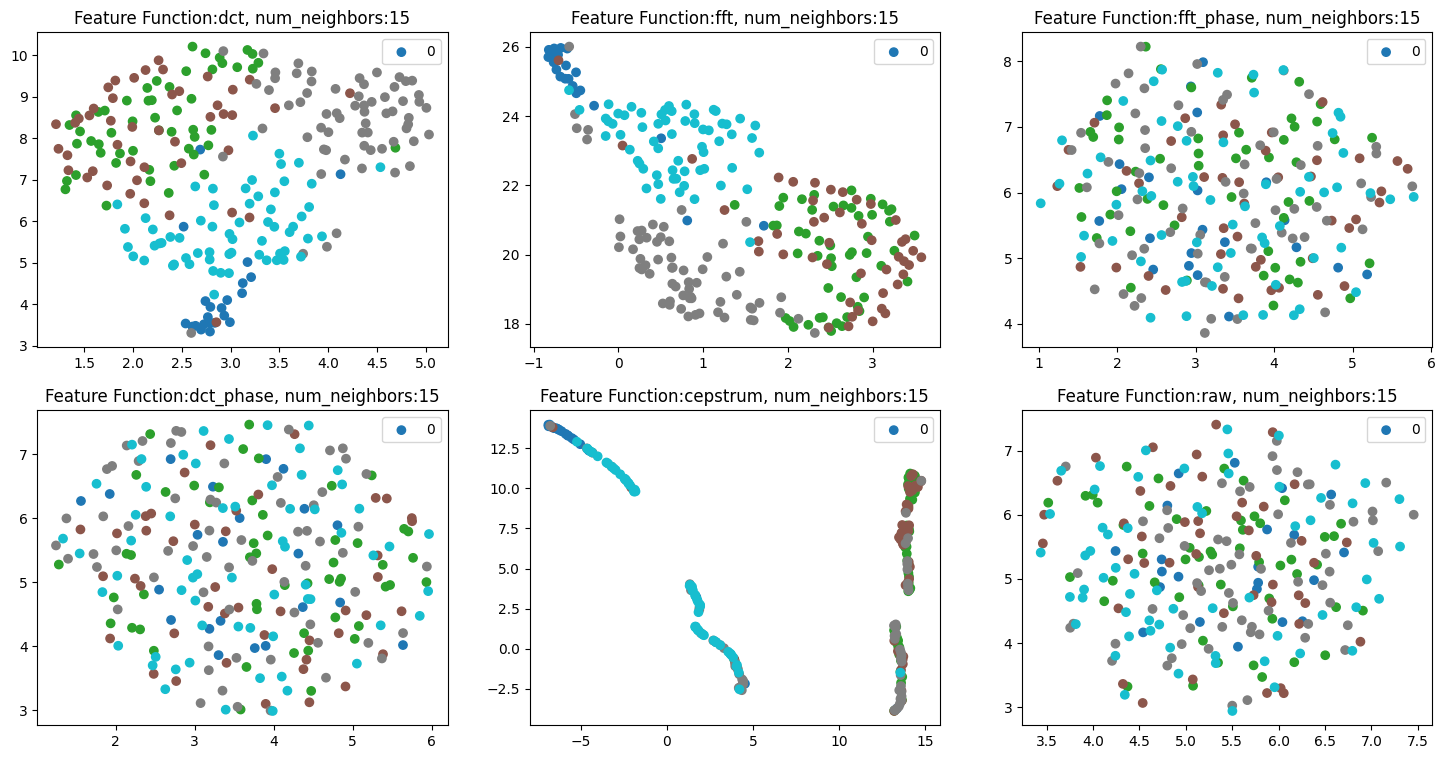

In [11]:
parameters = {
'size':4000, 
'step':4000, 
'decimate':5,
'feature_range' :(0, 1),
'window_fn': 'boxcar',
'feature_fn':"fft" 
}
d =0.1
for k in [3,5,7,10,15]:
    plt.figure(figsize=(18,9))
    #for size in [50000]:
    for i,feature_fn in enumerate(valid_feature_fns):
            # parameters['size'] = size
            # parameters['step'] = int(size * 0.6)
            parameters['feature_fn'] = feature_fn
            plt.subplot(2,3,i+1)
            fit = umap.UMAP(n_neighbors=k)
            X, y = audio_task.load_data(parameters)
            u = fit.fit_transform(X)
            plt.scatter(u[:,0], u[:,1], c=y, cmap='tab10')
            plt.title(f'Feature Function:{feature_fn}, num_neighbors:{k}')
            plt.legend(y)
            #plt.title(f'size:{size},min_dist:{d}')


Loading into 108 windows of length 4000
Loading into 259 windows of length 4000
Loading into 222 windows of length 4000


Loading into 316 windows of length 4000
Loading into 306 windows of length 4000
Using fft transform and a boxcar window.
Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows of length 4000
Loading into 123 windows of length 4000
Using fft transform and a boxcar window.
Loading into 31 windows of length 4000
Loading into 74 windows of length 4000
Loading into 64 windows of length 4000
Loading into 91 windows of length 4000
Loading into 88 windows of length 4000
Using fft transform and a boxcar window.


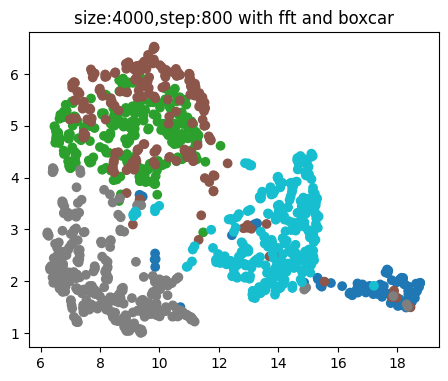

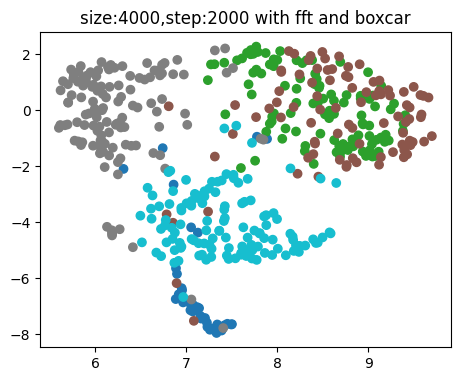

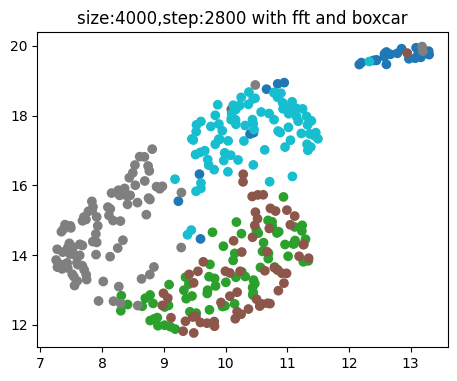

In [12]:
parameters = {
'size':4000, # how long each window is, in samples
'step':4000, # how many samples to move forward in each window
'decimate':5, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0, 1), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"boxcar", # one of window_fns (below)
'feature_fn':"fft" # one of feature_fns    
}
d=0.1

for size in [4000]:
    for overlap in [0.2,0.5,0.7]:
        parameters['size'] = size
        step= int(size * overlap)
        parameters['step'] = step
        plt.figure(figsize=(18,9))
        plt.subplot(2,3,i+1)
        fit = umap.UMAP(min_dist=d)
        X, y = audio_task.load_data(parameters)
        u = fit.fit_transform(X)
        plt.scatter(u[:,0], u[:,1], c=y, cmap='tab10')
        plt.title(f'size:{size},step:{step} with fft and boxcar')

3D UMAP plot

In [13]:
import umap
import plotly.express as px
import pandas as pd
parameters = {
'size':4000, 
'step':500, 
'decimate':5,
'feature_range' :(0, 1),
'window_fn': 'boxcar',
'feature_fn':"fft" 
}
d =0.1
X,y = audio_task.load_data(parameters)


umap_model_3d = umap.UMAP(n_components=3)
umap_X_3d = umap_model_3d.fit_transform(X)

umap_df = pd.DataFrame(data=umap_X_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Class'] = y

fig = px.scatter_3d(
    umap_df, x='UMAP1', y='UMAP2', z='UMAP3',
    color='Class', opacity=0.7,
    size_max=8,
    labels={'Class': 'Class'}
)


fig.update_layout(scene=dict(aspectmode='cube'))

fig.show()


Loading into 172 windows of length 4000
Loading into 414 windows of length 4000
Loading into 355 windows of length 4000
Loading into 505 windows of length 4000
Loading into 489 windows of length 4000
Using fft transform and a boxcar window.


### Using LLE

Funciton to plot LLE varying n_neighbors

In [14]:
import sklearn.manifold
def plot_LLE(n_neighbors):
    fig, ax = plt.subplots(figsize=(10, 10))

    lle2 = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors)


    subsample = 1
    lle2_X = lle2.fit_transform(X[::subsample, :])

    # show a scatter plot of the first two dimensions
    scatter = ax.scatter(
        lle2_X[:, 0],
        lle2_X[:, 1],
        c=y[::subsample],
        cmap="tab10",
        vmin=0,
        vmax=10,
        alpha=0.7,
        s=8,
    )


    legend1 = ax.legend(*scatter.legend_elements(num=4), loc="upper left", title="Class")
    ax.add_artist(legend1)

    ax.axhline(0, color="k", alpha=0.1)
    ax.axvline(0, color="k", alpha=0.1)

    ax.axis("off")
    plt.title(f'LLE of Features with {n_neighbors} nearest neighbours')
    plt.show()

Varying LLE in subplots

Loading into 31 windows of length 4000
Loading into 74 windows of length 4000
Loading into 64 windows of length 4000
Loading into 91 windows of length 4000
Loading into 88 windows of length 4000


Using cepstrum transform and a hann window.
Loading into 31 windows of length 4000
Loading into 74 windows of length 4000
Loading into 64 windows of length 4000
Loading into 91 windows of length 4000
Loading into 88 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 31 windows of length 4000
Loading into 74 windows of length 4000
Loading into 64 windows of length 4000
Loading into 91 windows of length 4000
Loading into 88 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 31 windows of length 4000
Loading into 74 windows of length 4000
Loading into 64 windows of length 4000
Loading into 91 windows of length 4000
Loading into 88 windows of length 4000
Using cepstrum transform and a hann window.
Loading into 31 windows of length 4000
Loading into 74 windows of length 4000
Loading into 64 windows of length 4000
Loading into 91 windows of length 4000
Loading into 88 windows of length 4000
Using cepstrum transform and a hann window.


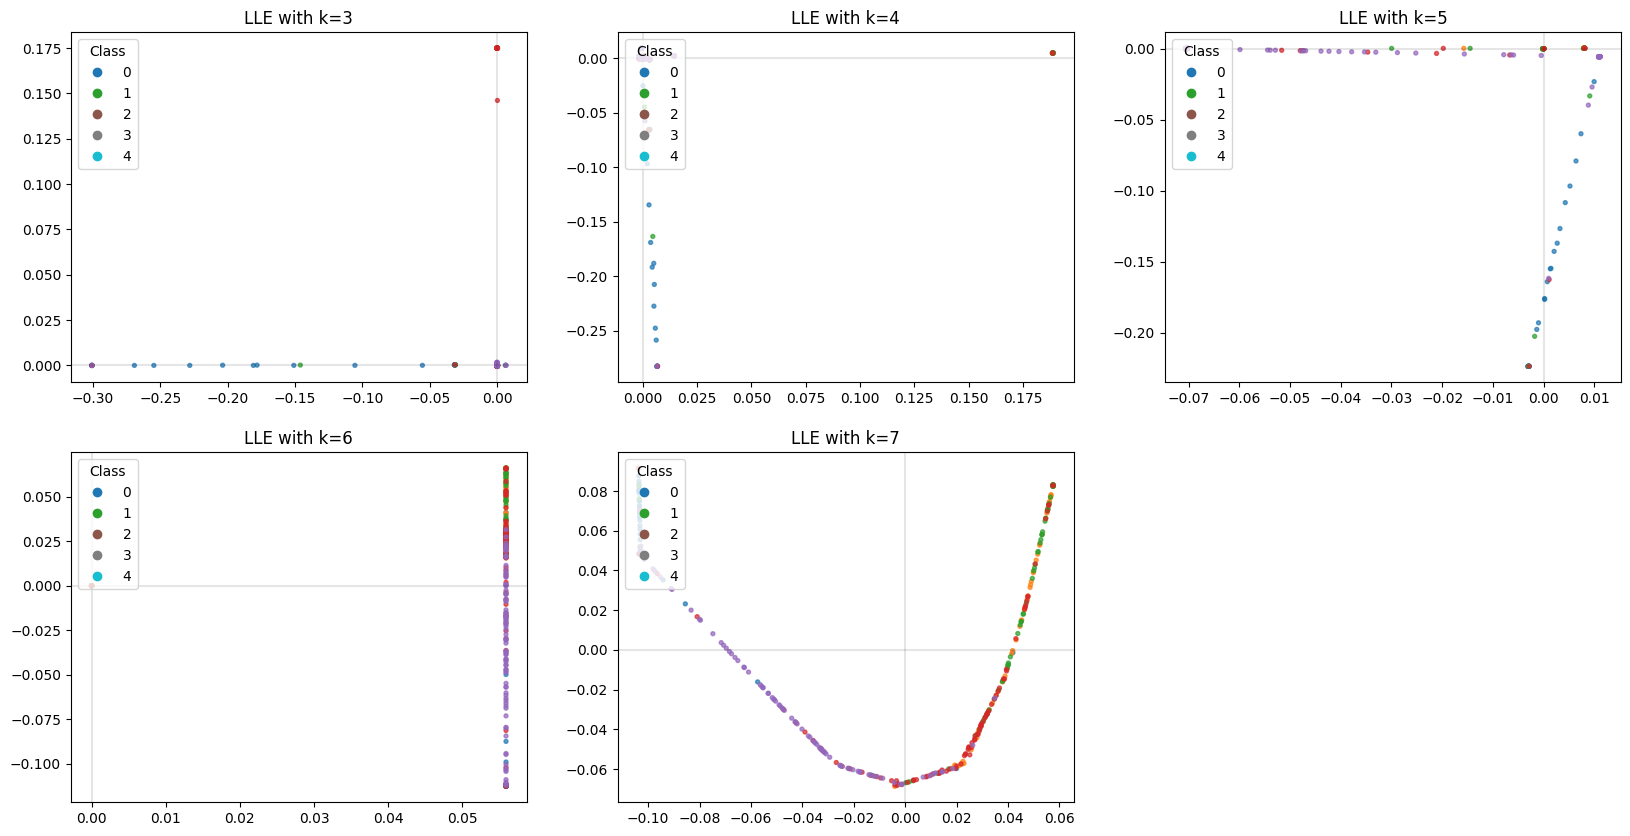

In [15]:
import sklearn.manifold

parameters = {
'size':4000, # how long each window is, in samples
'step':int(4000 * 0.7), # how many samples to move forward in each window
'decimate':5, # how much reduction of the feature vector to perform; integer = 1,2,3,4,5...
'feature_range' :(0, 1), # what slice of the feature vectors to take (0.0, 1.0)=whole vector
# must be between 0.0 and 1.0 for the start and end 
'window_fn':"hann", # one of window_fns (below)
'feature_fn':"cepstrum" # one of feature_fns    
}
plt.figure(figsize=(20,10))
for i,k in enumerate([3,4,5,6,7]):

    lle2 = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=k)
    X, y = audio_task.load_data(parameters)

    subsample = 1
    lle2_X = lle2.fit_transform(X[::subsample, :])

    # show a scatter plot of the first two dimensions
    plt.subplot(2,3,i+1)
    plt.scatter(
        lle2_X[:, 0],
        lle2_X[:, 1],
        c=y[::subsample],
        cmap="tab10",
        vmin=0,
        vmax=10,
        alpha=0.7,
        s=8,
    )


    plt.legend(*scatter.legend_elements(num=4), loc="upper left", title="Class")

    plt.axhline(0, color="k", alpha=0.1)
    plt.axvline(0, color="k", alpha=0.1)

    plt.title(f'LLE with k={k}')


### Using ISOMAP

Function to plot ISOMAP varying n_neighbors

In [16]:
def plot_ISOMAP(n_neighbors):
    fig, ax = plt.subplots(figsize=(10, 10))

    # create an Isomap object
    isomap2 = sklearn.manifold.Isomap(n_neighbors=n_neighbors)

    # transform every fifth vector (to save computation time)
    # some techniques need this; others will be fast enough
    subsample = 1
    isomap2_X = isomap2.fit_transform(X[::subsample, :])

    # show a scatter plot of the first two dimensions
    scatter = ax.scatter(
        isomap2_X[:, 0],
        isomap2_X[:, 1],
        c=y[::subsample],
        cmap="tab10",
        vmin=0,
        vmax=10,
        alpha=0.7,
        s=8,
    )

    ##### Make the figure look a bit cleaner
    # Produce a legend for the ranking (colors). Even though there are 40 different
    # rankings, we only want to show 5 of them in the legend.
    legend1 = ax.legend(*scatter.legend_elements(num=4), loc="upper left", title="Class")
    ax.add_artist(legend1)

    ax.axhline(0, color="k", alpha=0.1)
    ax.axvline(0, color="k", alpha=0.1)

    ax.axis("off")
    plt.title('Isomap of Features')
    plt.show()


### Using tSNE

Basic Plot TSNE function

In [17]:
def plot_TSNE(perplexity):
    fig, ax = plt.subplots(figsize=(10, 10))

    # create a t-SNE object
    tsne2 = sklearn.manifold.TSNE(perplexity=perplexity)

    # transform every fifth vector (to save computation time)
    # some techniques need this; others will be fast enough
    subsample = 1
    tsne2_X = tsne2.fit_transform(X[::subsample, :])

    # show a scatter plot of the first two dimensions
    scatter = ax.scatter(
        tsne2_X[:, 0],
        tsne2_X[:, 1],
        c=y[::subsample],
        cmap="tab10",
        vmin=0,
        vmax=10,
        alpha=0.7,
        s=8,
    )

    legend1 = ax.legend(*scatter.legend_elements(num=4), loc="upper left", title="Class")
    ax.add_artist(legend1)

    ax.axhline(0, color="k", alpha=0.1)
    ax.axvline(0, color="k", alpha=0.1)

    ax.axis("off")
    plt.title('t-SNE of Features')
    plt.show()

In [18]:
def var_plot_TSNE(perplexity, varied_param_name, varied_param_values, subsample=1):
    
    fig, ax = plt.subplots(2, len(varied_param_values)//2, figsize=(18, 9))
    
    for idx, vp in enumerate(varied_param_values):  # Corrected enumeration here
        
        parameters[varied_param_name] = vp

        X, y = audio_task.load_data(parameters)
        
        tsne2 = sklearn.manifold.TSNE(perplexity=perplexity)

        tsne2_X = tsne2.fit_transform(X[::subsample, :])

        # Corrected indentation for the following block
        scatter = ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].scatter(
            tsne2_X[:, 0],
            tsne2_X[:, 1],
            c=y[::subsample],
            cmap="tab10",
            vmin=0,
            vmax=10,
            alpha=0.7,
            s=8,
        )

        legend1 = ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].legend(*scatter.legend_elements(num=4), loc="upper left", title="Class")
        ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].add_artist(legend1)

        ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].axhline(0, color="k", alpha=0.1)
        ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].axvline(0, color="k", alpha=0.1)

        ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].axis("off")
        ax[idx // (len(varied_param_values)//2), idx % (len(varied_param_values)//2)].set_title(f't-SNE {varied_param_name}:{vp}')

    plt.show()



Varying perplexity for t-SNE

Loading into 44 windows of length 2000
Loading into 105 windows of length 2000
Loading into 90 windows of length 2000
Loading into 128 windows of length 2000
Loading into 124 windows of length 2000
Using cepstrum transform and a boxcar window.
5


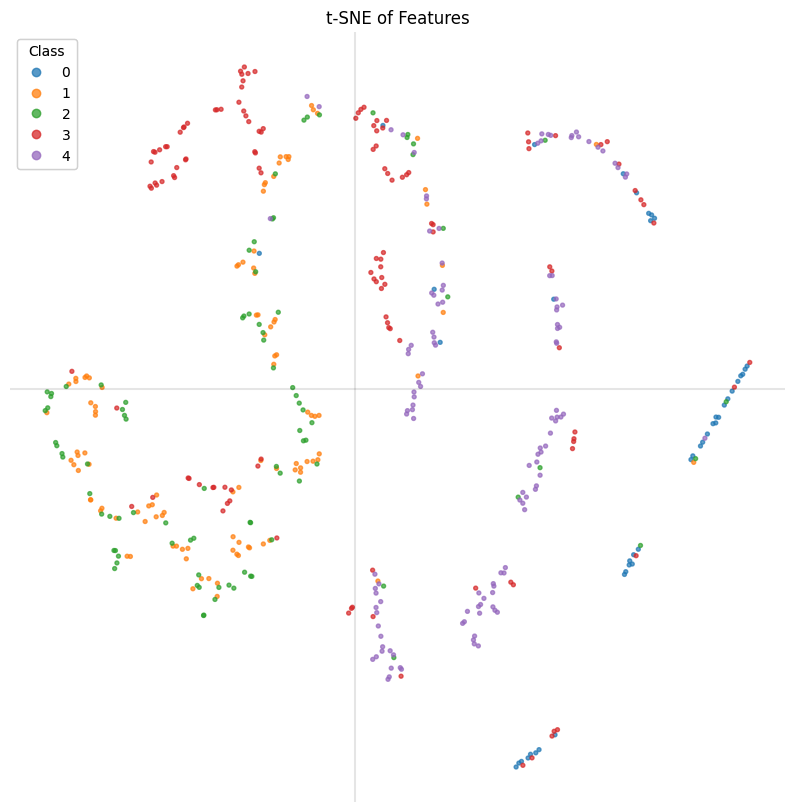

10


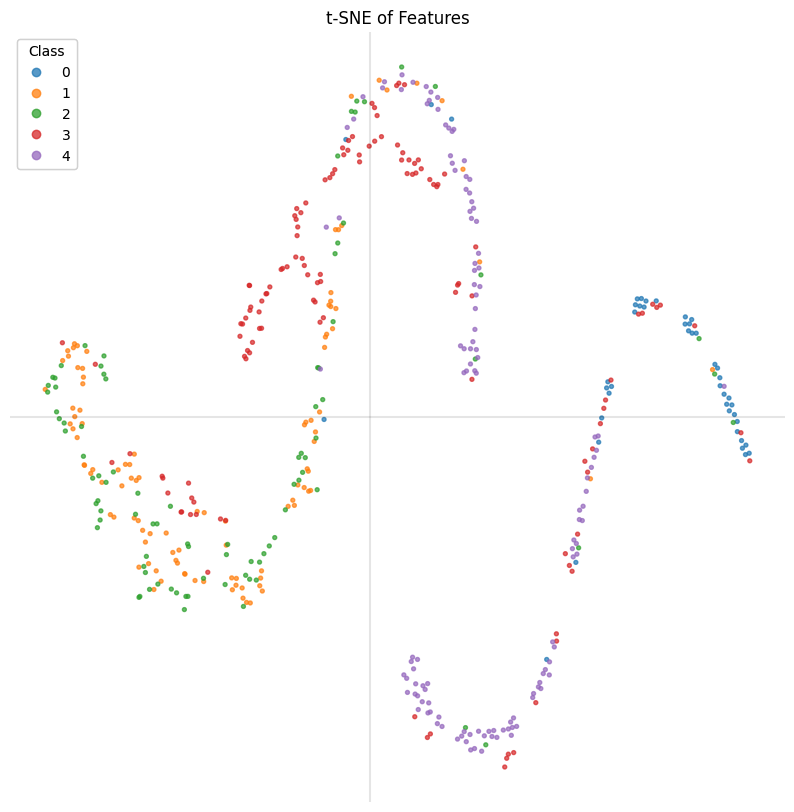

15


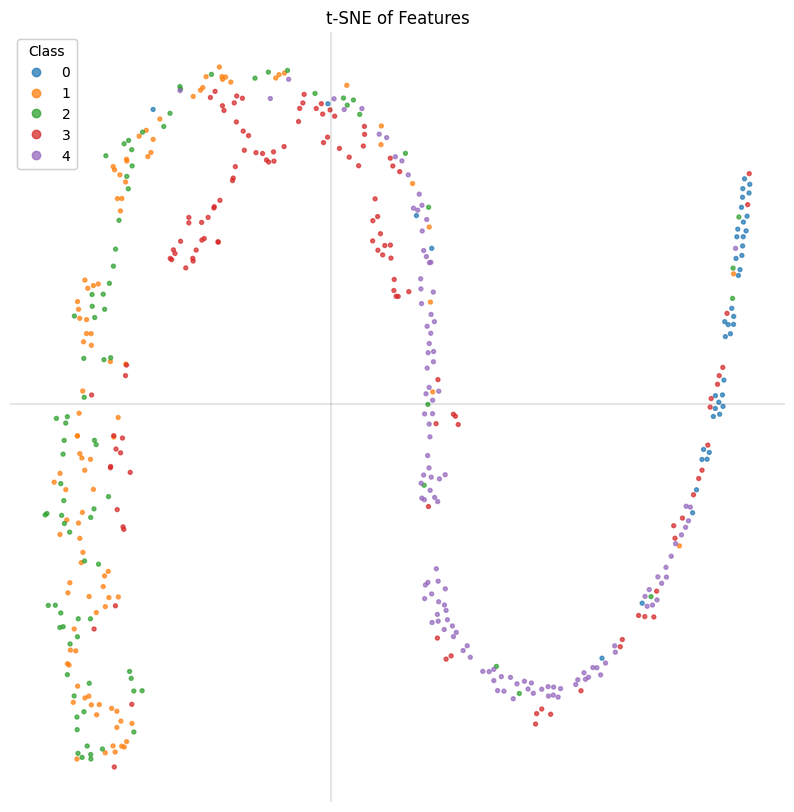

20


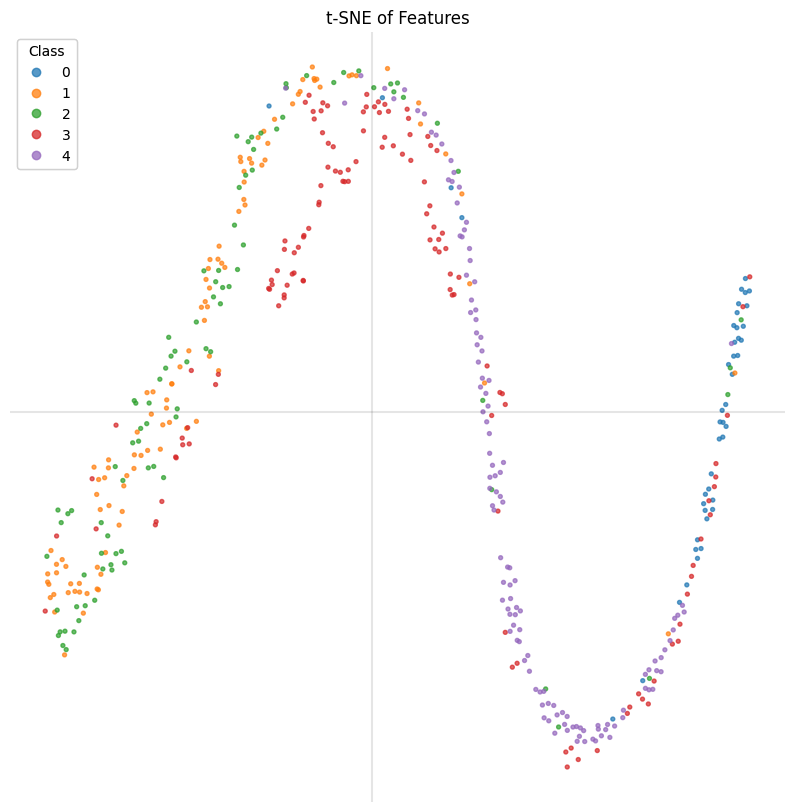

30


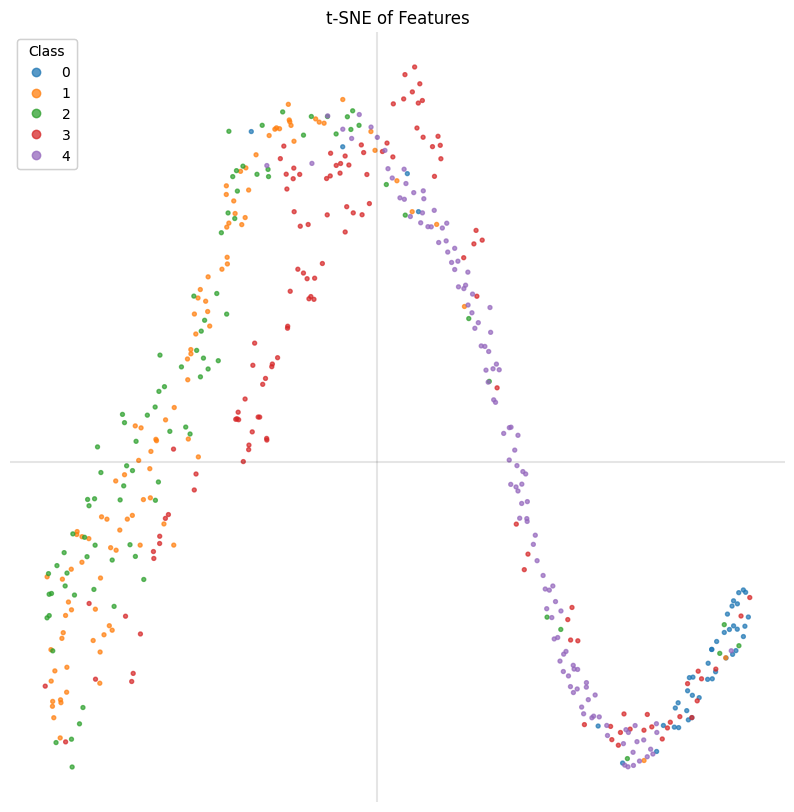

In [19]:
parameters = {'size': 2000, 'step': 2000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'cepstrum'}
X, y = audio_task.load_data(parameters)
for perplexity in [5,10,15,20,30]:
    print(perplexity)
    plot_TSNE(perplexity=perplexity)

Varying parameters for t-SNE

Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using fft transform and a hamming window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using fft transform and a hann window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using fft transform and a boxcar window.
Loading into 86 windows of length 4000
Loading into 207 windows of length 4000
Loading into 178 windows of length 4000
Loading into 253 windows of length 4000
Loading into 245 windows of length 4000
Using fft transform and a blackmanharris window.


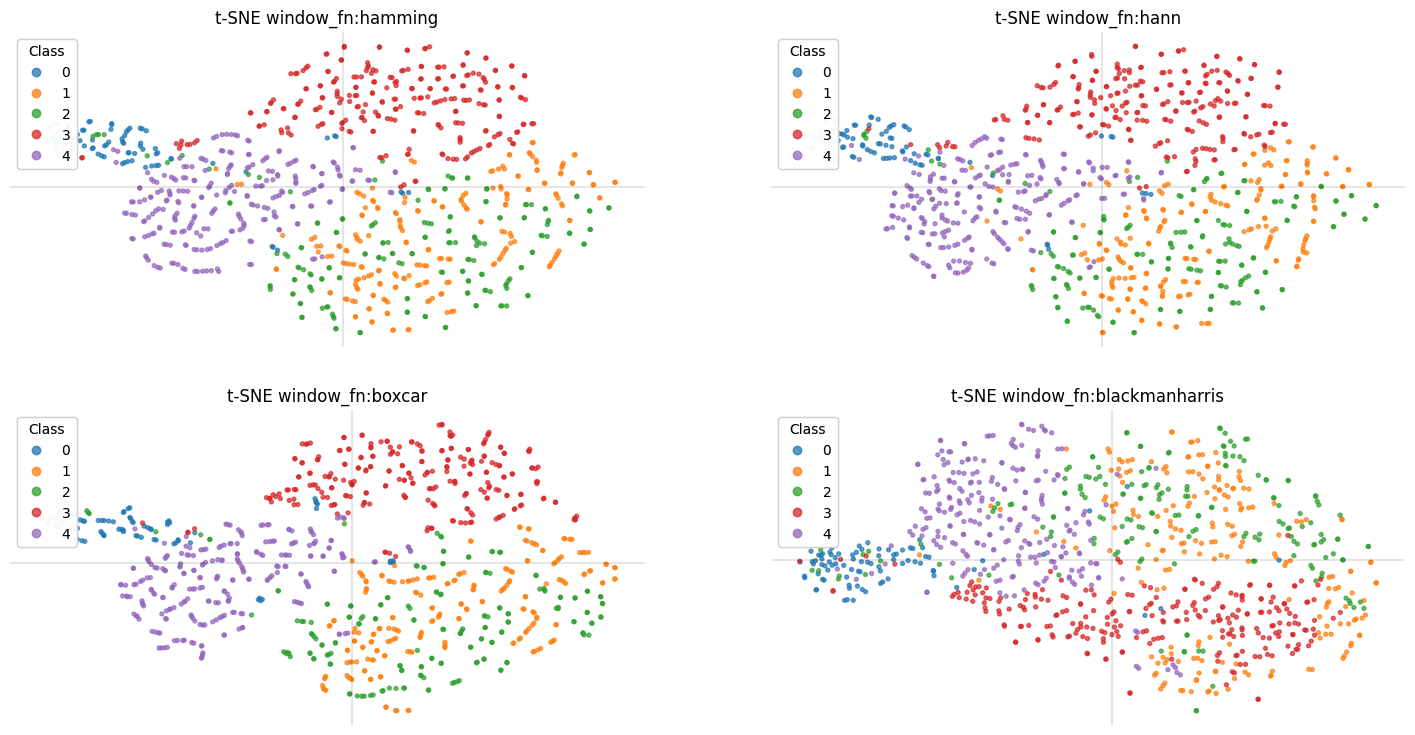

In [20]:
parameters = {'size': 4000, 'step': 1000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'fft'}
for p in [10]:
    var_plot_TSNE(perplexity=p, varied_param_name='window_fn', varied_param_values=valid_window_fns)

## Classifier
The code below creates a standard KNN classifier which predicts the output class based on the 7 nearest elements in feature vector space. 

In [21]:
PCA_parameters = {'size': 4000, 'step': 2000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'cepstrum'}
tSNE_parameters = {'size': 4000, 'step': 2500, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'fft'}
UMAP_parameters = {'size': 5000, 'step': 1000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'fft'} 

In [22]:
size = 5000
parameters = {'size': 4000, 'step': 3000, 'decimate': 1, 'feature_range': (0, 1), 'window_fn': 'boxcar', 'feature_fn': 'fft'}

In [23]:
X, y = audio_task.load_data(parameters)
classifier = audio_task.knn_fit(X, y)

Loading into 29 windows of length 4000
Loading into 69 windows of length 4000
Loading into 60 windows of length 4000
Loading into 85 windows of length 4000
Loading into 82 windows of length 4000
Using fft transform and a boxcar window.


### Visualising predictions 
You can preview your results with a separate (non-secret) test set which is provided. This will show you a visualisation of your classifier versus the ground truth. Each visualisation shows the true activity (below the axis) as coloured blocks and the predicted activity (from the classifier) as coloured blocks above the axis.

In the case of perfect classification, the blocks above and below the line will be exactly the same. In practice, there will always be significant noise.

Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows of length 4000
Loading into 123 windows of length 4000
Using cepstrum transform and a boxcar window.
Testing with data/challenge_test_0
Loading into 38 windows of length 4000
Predicting...
Prediction accuracy 0.875
Confusion matrix
[[491   0   0   0   0]
 [ 53 249  26   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0  17   0  27 120]]

Testing with data/challenge_test_1
Loading into 59 windows of length 4000


Predicting...
Prediction accuracy 0.197
Confusion matrix
[[ 14  39  27 187 191]
 [  0   0   0   0   0]
 [  0 181  45  52  27]
 [  0 146 192 118   0]
 [ 52   0   0 129 123]]

Testing with data/challenge_test_2
Loading into 26 windows of length 4000
Predicting...
Prediction accuracy 0.933
Confusion matrix
[[ 69  46]
 [  0 574]]

Testing with data/challenge_test_3
Loading into 55 windows of length 4000
Predicting...
Prediction accuracy 0.907
Confusion matrix
[[447   0   0  27]
 [  0 447   0  26]
 [  0   0   0   0]
 [  0   0  79 394]]

Testing with data/challenge_test_4
Loading into 37 windows of length 4000
Predicting...
Prediction accuracy 0.138
Confusion matrix
[[  0   0   0]
 [601 133 227]
 [  0   0   0]]

Loading into 35 windows of length 4000
Loading into 83 windows of length 4000
Loading into 71 windows of length 4000
Loading into 101 windows of length 4000
Loading into 98 windows of length 4000
Using fft transform and a boxcar window.
Testing with data/challenge_test_0
Loading into

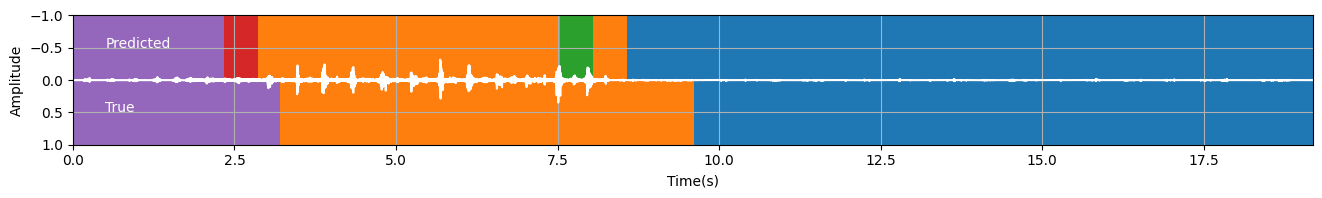

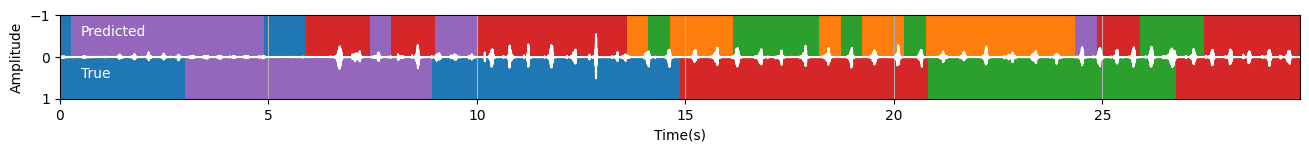

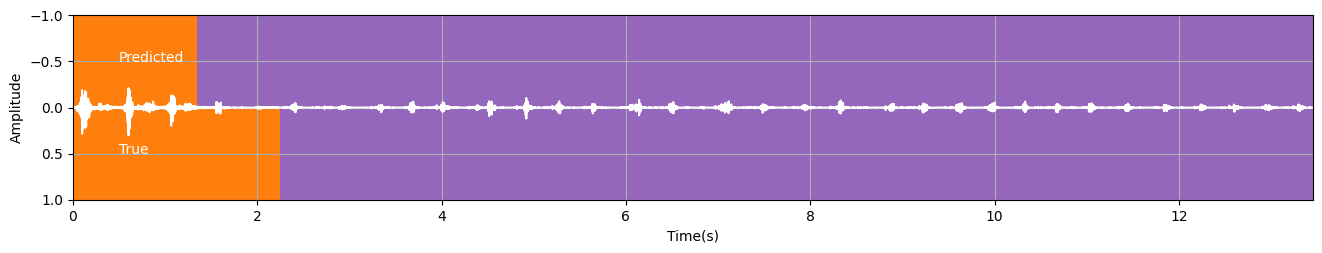

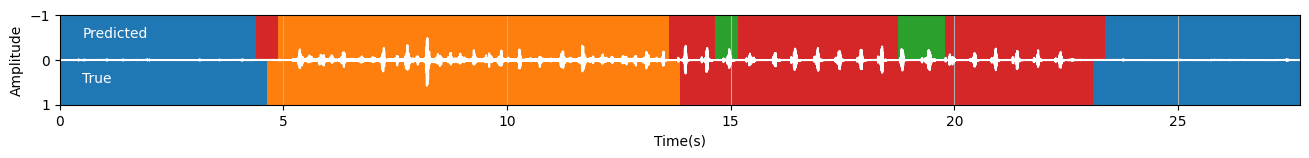

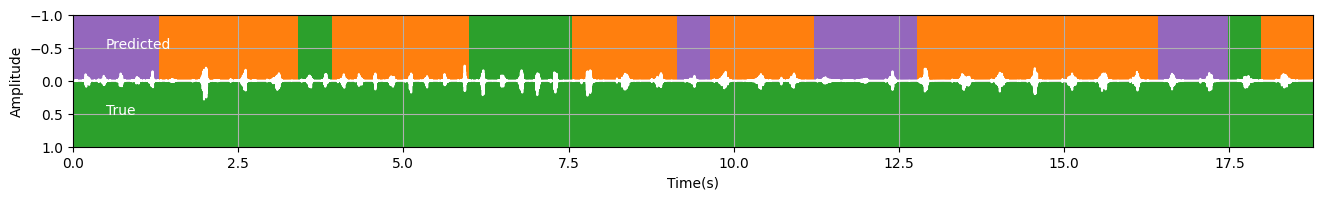

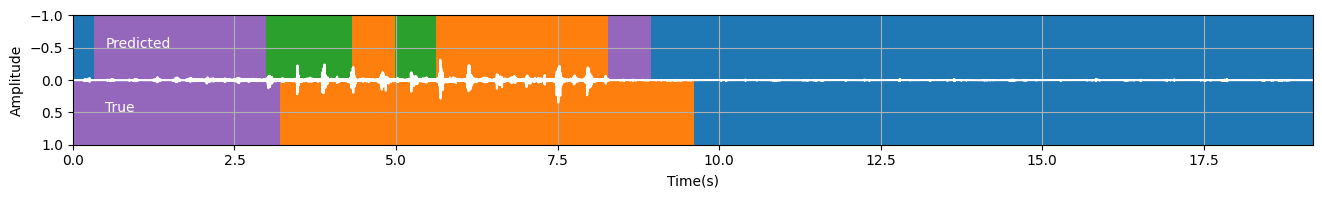

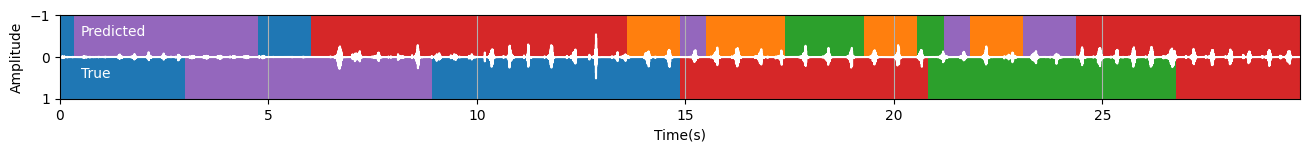

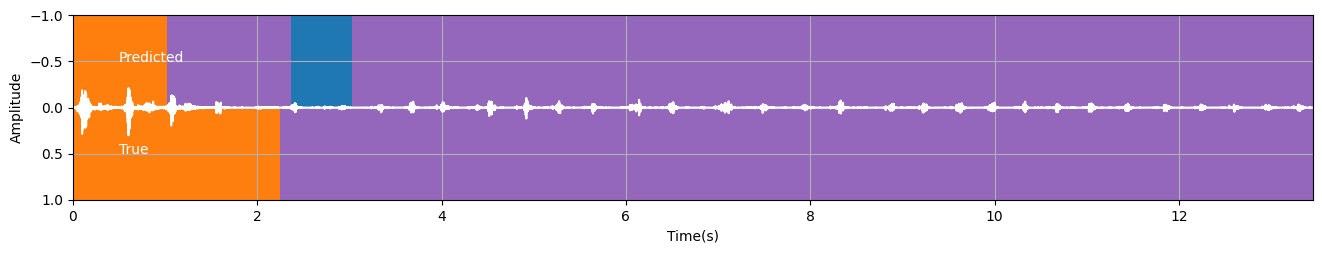

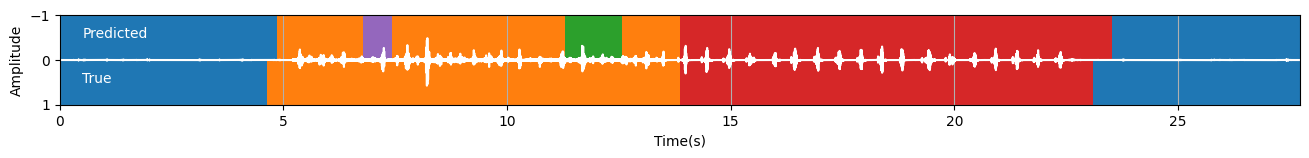

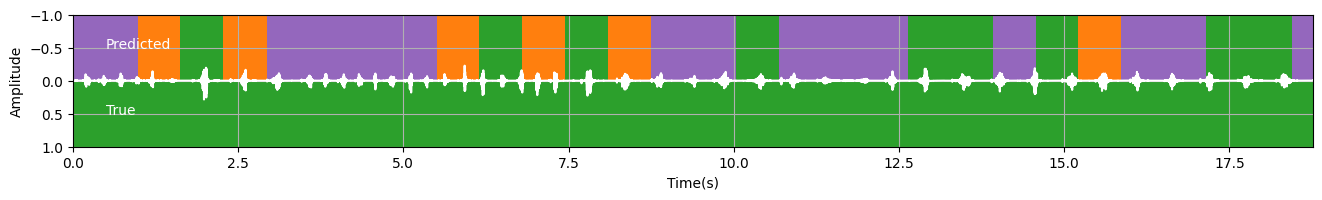

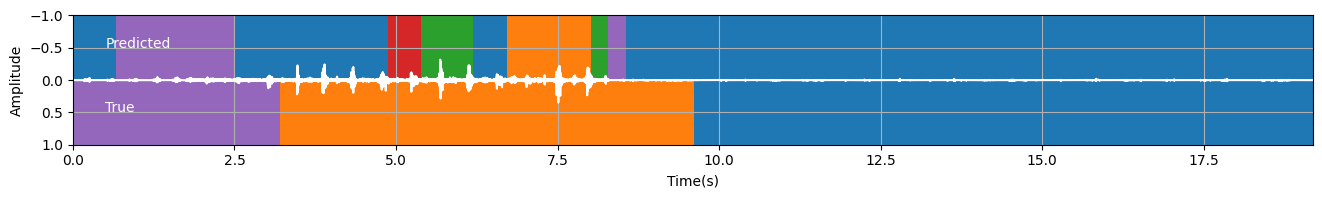

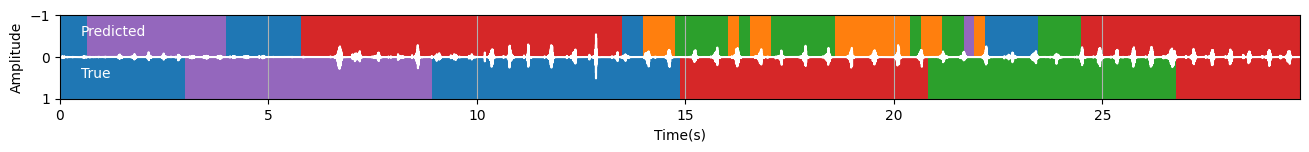

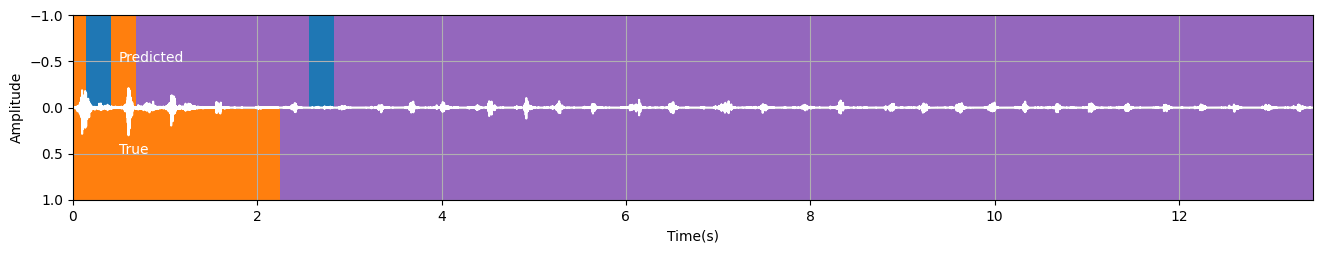

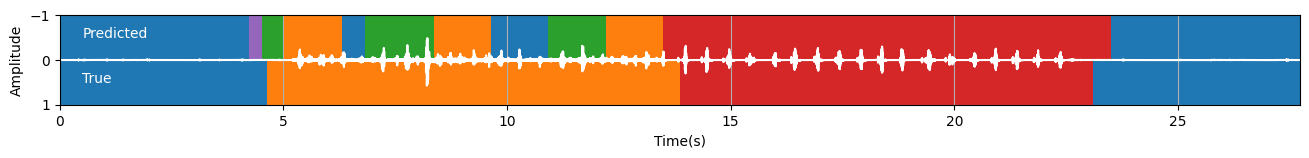

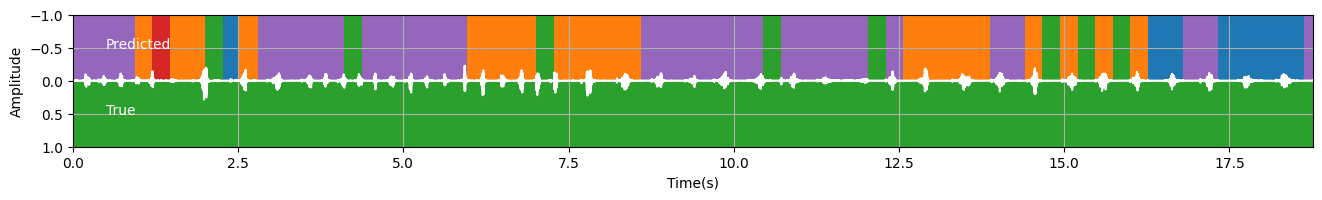

In [24]:
for parameters in [PCA_parameters,tSNE_parameters,UMAP_parameters]:
    X, y = audio_task.load_data(parameters)
    classifier = audio_task.knn_fit(X, y)
    for i in range(5):
        audio_task.plot_test(classifier, parameters, f"data/challenge_test_{i}")

### Final test function
There is a test function `challenge_evaluate_performance(classifier_fn)`. This gives you your total current score. You don't have access to the internals of this function. See below for how to use it.
The test takes some time to run; so you must be parsimonious with your calls to it.

In [25]:
## Shows how to evaluate your performance
for parameters in [PCA_parameters,tSNE_parameters,UMAP_parameters]:
    X, y = audio_task.load_data(parameters)
    classifier = audio_task.knn_fit(X, y)
    audio_task.run_secret_test(classifier, parameters)

Loading into 43 windows of length 4000
Loading into 104 windows of length 4000
Loading into 89 windows of length 4000
Loading into 127 windows of length 4000
Loading into 123 windows of length 4000
Using cepstrum transform and a boxcar window.
Loading into 98 windows of length 4000
Predicting...
Loading into 30 windows of length 4000
Predicting...


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Loading into 17 windows of length 4000
Predicting...
Loading into 87 windows of length 4000
Predicting...
Loading into 3 windows of length 4000
Predicting...
Loading into 34 windows of length 4000
Predicting...
Loading into 24 windows of length 4000


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels wit

Predicting...
Loading into 74 windows of length 4000
Predicting...
*** Total score: 77.00 ***
Loading into 35 windows of length 4000
Loading into 83 windows of length 4000
Loading into 71 windows of length 4000
Loading into 101 windows of length 4000
Loading into 98 windows of length 4000
Using fft transform and a boxcar window.
Loading into 78 windows of length 4000
Predicting...
Loading into 24 windows of length 4000
Predicting...
Loading into 14 windows of length 4000
Predicting...
Loading into 70 windows of length 4000
Predicting...


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Loading into 2 windows of length 4000
Predicting...
Loading into 28 windows of length 4000
Predicting...
Loading into 19 windows of length 4000
Predicting...
Loading into 59 windows of length 4000
Predicting...
*** Total score: 73.07 ***
Loading into 85 windows of length 5000


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels wit

Loading into 206 windows of length 5000
Loading into 177 windows of length 5000
Loading into 252 windows of length 5000
Loading into 244 windows of length 5000
Using fft transform and a boxcar window.
Loading into 194 windows of length 5000
Predicting...


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Loading into 58 windows of length 5000
Predicting...
Loading into 33 windows of length 5000
Predicting...
Loading into 173 windows of length 5000
Predicting...


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Loading into 4 windows of length 5000
Predicting...
Loading into 67 windows of length 5000
Predicting...
Loading into 46 windows of length 5000
Predicting...
Loading into 146 windows of length 5000
Predicting...
*** Total score: 75.23 ***


/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/home/jamie-linux/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

